# 3<sup>o</sup> crédito de Aquisição de Conhecimento

# Agrupamento

## Sumário

- [Objetivos](#objetivos-do-trabalho)

- [Preparação](#preparacao)

- [Importando-bibliotecas](#importando-as-bibliotecas)

- [Importando-DataSet](#importando-dataset-water_flow_by_day-de-datasetsraw)

- [Exclusão-de-Colunas](#excluindo-colunas-irrelevantes)

- [Renomeando-Colunas](#renomeando-colunas)

- [Valores-Unicos-de-Colunas](#verificando-os-valores)

- [Mudancas-de-Tipos-das-Colunas](#mudanca-dos-tipos-das-colunas)

- [Analise-Exploratoria-dos-Dados](#analise-exploratoria-dos-dados-aed)

- [Verificacao-de-valores-NaN](#verificando-se-ha-valores-nans)

- [Verificacao-de-valores-nulos](#verificando-se-ha-valores-nulos)

- [Visualizacao-dos-dados](#representacao-grafica)

- [Exclusao-de-outlier-em-coluna-litros-por-cabeca](#exclusao-de-outlier-sobre-a-coluna-litros_por_cabeca)

- [Continuacao-da-visualizacao-dos-dados](#voltando-a-impressao-dos-dados)

- [Parte-1](#parte-1)

- [Parte-2](#parte-2)

## Objetivos do trabalho

No contexto de produção animal, seja a seguinte base de dados contendo o consumo diário de água pelo grupo de animais (chamado de lote):

![Exemplo_do_DataFrame](img/imagem0.png)

Para cada dia de alojamento (lot_day), temos, na ordem, a estação do ano a qual se refere
o dia, a idade dos animais do lote, o consumo médio de água por cabeça, um número identificador do lote e num número identificador do produtor/fazenda que produziu o lote.

Uma fazenda pode produzir mais de um lote.

A base contém o consumo diário entre os dias 3 e 43 de alojamento dos animais. Como mostra a imagem.

A base pode conter dados faltantes, você deve lidar com isso. Perceba que o consumo de água aumenta ao longo dos dias, então talvez preencher com valor médio não seja a solução ideal (por exemplo, o dia 3, poderia ter valor muito alto, se usarmos a média de todos os dias para preencher seu dado). Uma média local pode ser mais adequada. Além disso, descartar lotes com dados faltantes pode resultar em uma base muito pequena, então cuidado ao usar essa estratégia.

[1<sup>o</sup>](#parte-1) Você deve usar o consumo diário como variáveis para agrupar os lotes. Isto é, seu:

x<sub>1</sub> = consumo de água por cabeça no dia 3 de alojamento.

x<sub>2</sub> = consumo de água por cabeça no dia 4 de alojamento.

…

x<sub>n</sub> = consumo de água por cabeça no dia m de alojamento

a. Deve escolher quais métricas para comparação usar;

b. Qual número de grupos;

c. Qual algoritmo ou variação do algoritmo;

d. Como limpar ou lidar com os dados faltantes;

e. Para cada grupo, deve mostrar as curvas de consumo pertencentes a um grupo e seu centróide.


[2<sup>o</sup>](#parte-2) Comparar o perfil dos lotes de cada grupo encontrado. Mostrar as comparações em
gráficos e comentar sobre as diferenças ou semelhanças. Para isso, uma base de
dados auxiliar é dada, com informações extras referente ao lote:

![Exemplo_de_DataFrame](img/imagem1.png)


Em ordem: número identificador do lote, número de animais alojados, mortalidade em
percentual, idade dos animais no momento no início do lote, idade dos animais no final do
lote, peso médio dos animais no início do lote, peso médio dos animais no final do lote,
ganho de peso médio diário, consumo médio diário de ração, taxa de conversão alimentar,
dias de alojamento.

Da mesma maneira, podem haver outliers ou dados faltantes. Você não precisa usar todas
as variáveis, pode usar as mais relevantes na comparação dos grupos.

## Preparacao

### Importando as bibliotecas

In [2]:
import numpy as np
import pandas as pd

# bibliotecas graficas
from matplotlib import pyplot as plt
import seaborn as sns

# modelos
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

### Importando dataset *water_flow_by_day* de *./datasets/raw/*

In [3]:
df_waterflow_raw = pd.read_csv("datasets/raw/water_flow_by_day.csv", sep = ",")

### Alguns valores do Dataset

In [4]:
df_waterflow_raw.head(5)

Unnamed: 0  lot_day season   age  per_capita  lot_id prod_id
0           0        3    inv  23.0    0.346664  615812     n_3
1           1        4    inv  24.0    0.708991  615812     n_3
2           2        5    inv  25.0    0.936537  615812     n_3
3           3        6    inv  26.0    0.722595  615812     n_3
4           4        7    inv  27.0    0.744303  615812     n_3

Como podemos ver, temos uma coluna sem nome que atual como contador das linhas.

Nós vamos deletar esta coluna eventualmente, pois é irrelevante para o DataFrame.

### Verificando os tipos dos dados

In [5]:
df_waterflow_raw.dtypes

Unnamed: 0      int64
lot_day         int64
season         object
age           float64
per_capita    float64
lot_id          int64
prod_id        object
dtype: object

### Quantidade de linhas do DataFrame

In [6]:
df_waterflow_raw.shape[0]

6074

Como podemos ver:
- O DataFrame possui 6074 linhas;
- 6 colunas relevantes;

- 1 coluna irrelevante;

- A idade dos animais está sendo tratada como ponto flutuante;

- O lote está sendo tratado como ponto flututante;

- O id está sendo tratado como tipo Objeto.

### Excluindo colunas irrelevantes

In [7]:
df_waterflow_processed = df_waterflow_raw.drop(columns = ["Unnamed: 0"])
df_waterflow_processed.head(5)

lot_day season   age  per_capita  lot_id prod_id
0        3    inv  23.0    0.346664  615812     n_3
1        4    inv  24.0    0.708991  615812     n_3
2        5    inv  25.0    0.936537  615812     n_3
3        6    inv  26.0    0.722595  615812     n_3
4        7    inv  27.0    0.744303  615812     n_3

### Renomeando colunas

In [8]:
colunas_renomear = {
    "lot_day"       : "dia_lote",
    "season"        : "estacao_ano",
    "age"           : "idade_animal",
    "per_capita"    : "litros_por_cabeca",
    "lot_id"        : "id_lote",
    "prod_id"       : "id_produto"
}

In [9]:
df_waterflow_processed = df_waterflow_processed.rename(columns = colunas_renomear)
df_waterflow_processed.head(5)

dia_lote estacao_ano  idade_animal  litros_por_cabeca  id_lote id_produto
0         3         inv          23.0           0.346664   615812        n_3
1         4         inv          24.0           0.708991   615812        n_3
2         5         inv          25.0           0.936537   615812        n_3
3         6         inv          26.0           0.722595   615812        n_3
4         7         inv          27.0           0.744303   615812        n_3

### Verificando os valores

#### Valores únicos de cada coluna não numérica

##### Estação do ano

In [10]:
df_waterflow_processed.estacao_ano.unique()

array(['inv', 'out', 'pri', 'ver'], dtype=object)

##### ID do Lote

In [11]:
df_waterflow_processed.id_lote.unique()

array([615812, 880714, 339544, 339545, 339546, 387681, 393432, 403726,
       414323, 436332, 479845, 491363, 514226, 527072, 536408, 562446,
       589872, 637193, 664685, 720666, 758507, 794864, 542538, 542539,
       562033, 592317, 622239, 640128, 698330, 744887, 423966, 447340,
       483807, 507626, 523619, 530999, 544600, 582096, 610732, 629640,
       653501, 712037, 755669, 783289, 869971, 388793, 388794, 389469,
       400085, 483075, 501978, 522737, 529206, 544291, 571905, 607321,
       631156, 642729, 699708, 743546, 771448, 837020, 916201, 340063,
       340064, 387761, 389526, 395027, 406984, 418361, 445237, 637069,
       680260, 731535, 767820, 813661, 476539, 499077, 516748, 528115,
       539831, 339985, 339986, 339987, 389518, 393790, 405280, 415853,
       464403, 569703, 632012, 543334, 582752, 592484, 622513, 638672,
       687045, 743547, 771449, 340031, 340032, 340033, 387751, 393478,
       405281, 414343, 438737, 474020, 494878, 516243, 486165, 509381,
      

##### ID do Produto

In [12]:
df_waterflow_processed.id_produto.unique()

array(['n_3', 'n_0', 'n_1', 'n_2', 'n_9', 'n_5', 'n_11', 'n_4', 'n_6',
       'n_7', 'n_8', 'n_10', 'n_13', 'n_18'], dtype=object)

#### Verificando os valores únicos da coluna *dia_lote*

In [13]:
df_waterflow_processed.dia_lote.unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43])

### Mudanca dos tipos das colunas

#### Colunas categóricas

In [14]:
# dia_lote, estacao_ano, id_lote e id_produto
df_waterflow_processed.dia_lote = df_waterflow_processed.dia_lote.astype("category")
df_waterflow_processed.estacao_ano = df_waterflow_processed.estacao_ano.astype("category")
df_waterflow_processed.id_lote = df_waterflow_processed.id_lote.astype("category")
df_waterflow_processed.id_produto = df_waterflow_processed.id_produto.astype("category")

#### Colunas numéricas

In [15]:
# idade_animal
df_waterflow_processed.idade_animal = df_waterflow_processed.dia_lote.astype("uint8")

#### DataFrame atual

In [16]:
df_waterflow_processed.sample(5)

dia_lote estacao_ano  idade_animal  litros_por_cabeca id_lote id_produto
3941       20         pri            20           0.584338  712035        n_5
3319       12         inv            12           1.209248  340031        n_4
2633        4         pri             4           0.777939  680260        n_9
333        15         out            15           3.176735  414323        n_3
872        29         out            29           2.343529  794864        n_3

#### Tipos das colunas

In [17]:
df_waterflow_processed.dtypes

dia_lote             category
estacao_ano          category
idade_animal            uint8
litros_por_cabeca     float64
id_lote              category
id_produto           category
dtype: object

### Salvando o DataFrame processado

In [18]:
df_waterflow_processed.to_pickle("datasets/processed/dataset-gasto-agua.pkl")

### Analise Exploratoria dos Dados (AED)

#### Idade

##### Cálculo da média

In [19]:
round(df_waterflow_processed.idade_animal.mean(), 3)

22.956

##### Cálculo da mediana

In [20]:
df_waterflow_processed.idade_animal.median()

23.0

##### Desvio padrão

In [21]:
round(df_waterflow_processed.idade_animal.std(), 3)

11.78

##### Valor mínimo

In [22]:
df_waterflow_processed.idade_animal.min()

3

##### Valor máximo

In [23]:
df_waterflow_processed.idade_animal.max()

43

#### Litros por cabeça

##### Cálculo da média

In [24]:
round(df_waterflow_processed.litros_por_cabeca.mean(), 3)

2.595

##### Cálculo da mediana

In [25]:
round(df_waterflow_processed.litros_por_cabeca.median(), 3)

2.209

##### Desvio padrão

In [26]:
round(df_waterflow_processed.litros_por_cabeca.std(), 3)

1.854

##### Valor mínimo

In [27]:
round(df_waterflow_processed.litros_por_cabeca.min(), 3)

0.002

##### Valor máximo

In [28]:
round(df_waterflow_processed.litros_por_cabeca.max(), 3)

22.702

#### dia do lote

##### Quantidade de elementos em cada lote

In [29]:
df_waterflow_processed.groupby("dia_lote").agg("count")

estacao_ano  idade_animal  litros_por_cabeca  id_lote  id_produto
dia_lote                                                                   
3                 115           115                115      115         115
4                 127           127                127      127         127
5                 144           144                144      144         144
6                 152           152                152      152         152
7                 156           156                156      156         156
8                 161           161                161      161         161
9                 162           162                162      162         162
10                165           165                165      165         165
11                149           149                149      149         149
12                149           149                149      149         149
13                155           155                155      155         155
14                158           158                158      158         158
15                153           153                153      153         153
16                148           148                148      148         148
17                149           149                149      149         149
18                154           154                154      154         154
19                158           158                158      158         158
20                156           156                156      156         156
21                151           151                151      151         151
22                160           160                160      160         160
23                151           151                151      151         151
24                149           149                149      149         149
25                148           148                148      148         148
26                154           154                154      154         154
27                133           133                133      133         133
28                135           135                135      135         135
29                136           136                136      136         136
30                137           137                137      137         137
31                140           140                140      140         140
32                138           138                138      138         138
33                142           142                142      142         142
34                143           143                143      143         143
35                140           140                140      140         140
36                140           140                140      140         140
37                154           154                154      154         154
38                150           150                150      150         150
39                158           158                158      158         158
40                155           155                155      155         155
41                159           159                159      159         159
42                145           145                145      145         145
43                145           145                145      145         145

#### Estação do ano

##### Quantidade de elementos em cada estacao_ano

In [30]:
df_waterflow_processed.groupby("estacao_ano", sort = True).agg("count")

dia_lote  idade_animal  litros_por_cabeca  id_lote  id_produto
estacao_ano                                                                
inv              1550          1550               1550     1550        1550
out              1282          1282               1282     1282        1282
pri              1745          1745               1745     1745        1745
ver              1497          1497               1497     1497        1497

#### ID do lote

##### Quantidade de elementos em cada id_lote

In [31]:
df_waterflow_processed.groupby("id_lote", sort = True).agg("count")

dia_lote  estacao_ano  idade_animal  litros_por_cabeca  id_produto
id_lote                                                                    
339039         40           40            40                 40          40
339040         39           39            39                 39          39
339041         38           38            38                 38          38
339083         28           28            28                 28          28
339084         40           40            40                 40          40
...           ...          ...           ...                ...         ...
869971         39           39            39                 39          39
880714         41           41            41                 41          41
902085         40           40            40                 40          40
912928         13           13            13                 13          13
916201         30           30            30                 30          30

[188 rows x 5 columns]

#### ID do produto

##### Quantidade de elementos em cada id_produto

In [32]:
df_waterflow_processed.groupby("id_produto", sort = True).agg("count")

dia_lote  estacao_ano  idade_animal  litros_por_cabeca  id_lote
id_produto                                                                 
n_0              247          247           247                247      247
n_1              665          665           665                665      665
n_10             199          199           199                199      199
n_11              46           46            46                 46       46
n_13             377          377           377                377      377
n_18             113          113           113                113      113
n_2              829          829           829                829      829
n_3              887          887           887                887      887
n_4              602          602           602                602      602
n_5              587          587           587                587      587
n_6              718          718           718                718      718
n_7              300          300           300                300      300
n_8              326          326           326                326      326
n_9              178          178           178                178      178

### Verificando se ha valores NaN's

In [33]:
for coluna in df_waterflow_processed.columns:
    print("Coluna ", coluna, " : ", pd.isna(df_waterflow_processed[coluna]).sum())

Coluna  dia_lote  :  0
Coluna  estacao_ano  :  0
Coluna  idade_animal  :  0
Coluna  litros_por_cabeca  :  0
Coluna  id_lote  :  0
Coluna  id_produto  :  0


### Verificando se ha valores nulos

In [34]:
for coluna in df_waterflow_processed.columns:
    print("Coluna ", coluna, " : ", pd.isnull(df_waterflow_processed[coluna]).sum())

Coluna  dia_lote  :  0
Coluna  estacao_ano  :  0
Coluna  idade_animal  :  0
Coluna  litros_por_cabeca  :  0
Coluna  id_lote  :  0
Coluna  id_produto  :  0


### Representacao grafica

#### Histograma

In [35]:
def histograma(x:pd.Series, titulo:str = "Histograma", xlabel:str = None, ylabel:str = None, numerical:bool = True) -> None:
    figura = plt.figure(figsize = (12, 8))
    plt.hist(x = x)
    plt.title(titulo)
    
    if numerical == True:
        plt.xlim(x.min(), x.max())
    
    if xlabel != None:
        plt.xlabel(xlabel = xlabel)
    
    if ylabel != None:
        plt.ylabel(ylabel = ylabel)
    
    plt.show()

#### Scatterplot

In [36]:
def dispersao(x:pd.Series, y:pd.Series, titulo:str = "Gráfico de dispersão", xlabel:str = None, ylabel:str = None, numerical:bool = True) -> None:
    figura = plt.figure(figsize = (12, 8))
    plt.scatter(x = x, y = y)
    plt.title(titulo)
    
    if numerical == True:
        plt.xlim(x.min(), x.max())
    
    if xlabel != None:
        plt.xlabel(xlabel = xlabel)
    
    if ylabel != None:
        plt.ylabel(ylabel = ylabel)
    
    plt.show()

#### Boxplot

In [37]:
def boxplot(x:pd.Series, titulo:str = "Gráfico de boxplot", xlabel:str = None, ylabel:str = None) -> None:
    figura = plt.figure(figsize = (12, 8))
    sns.boxplot(x = x)
    plt.title(titulo)
    
    if xlabel != None:
        plt.xlabel(xlabel = xlabel)
    
    if ylabel != None:
        plt.ylabel(ylabel = ylabel)
    
    plt.show()

#### Distribuicao normal

In [38]:
def distribuicao_normal(x:pd.Series, titulo:str = "Gráfico de distribuição normal", xlabel:str = None, ylabel:str = None) -> None:
    figura = plt.figure(figsize = (12, 8))
    sns.distplot(x = x)
    plt.title(titulo)
    plt.xlim(x.min(), x.max())
    
    if xlabel != None:
        plt.xlabel(xlabel = xlabel)
    
    if ylabel != None:
        plt.ylabel(ylabel = ylabel)
    
    plt.show()

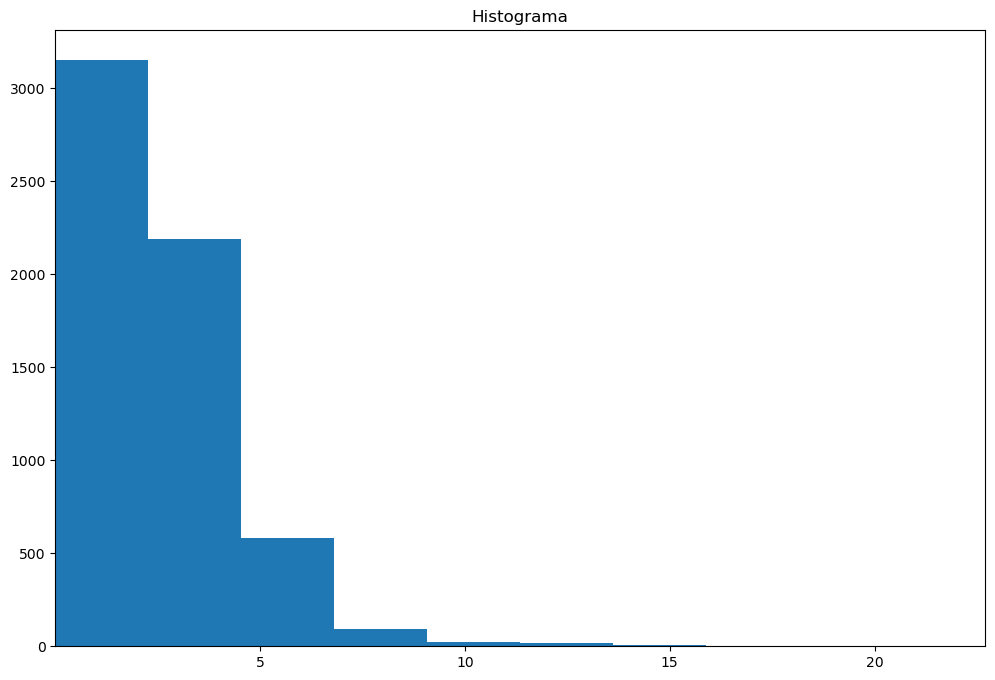

In [39]:
histograma(x = df_waterflow_processed["litros_por_cabeca"])

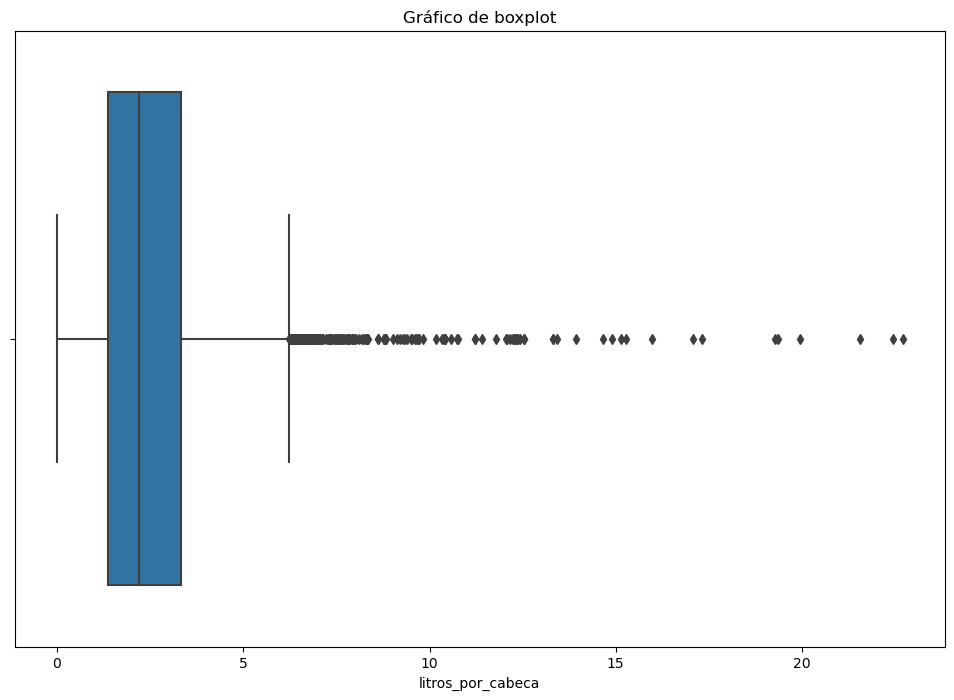

In [40]:
boxplot(x = df_waterflow_processed["litros_por_cabeca"])

Como podemos perceber, há muitos valores outliers em *litros_por_cabeca*.

Vamos excluir esses outliers utilizando do IQR.

#### Exclusao de outlier sobre a coluna *litros_por_cabeca*

##### recebendo os quartis e o interquartil

In [41]:
quartil1 = np.percentile(df_waterflow_processed["litros_por_cabeca"], 25, method = "midpoint")
quartil3 = np.percentile(df_waterflow_processed["litros_por_cabeca"], 75, method = "midpoint")
interquartil = quartil3 - quartil1
print("1ro quartil: ", quartil1, "\n3ro quartil: ", quartil3, "\nIQR: ", interquartil)

1ro quartil:  1.3804705774106911 
3ro quartil:  3.322055538696006 
IQR:  1.9415849612853147


##### Recebendo os valores de limite superior e inferior

In [42]:
limite_superior = quartil3 + (1.5 * interquartil)
limite_inferior = quartil1 - (1.5 * interquartil)
print("limite inferior: ", limite_inferior, "\nLimite Superior: ", limite_superior)

limite inferior:  -1.5319068645172806 
Limite Superior:  6.2344329806239775


##### Verificando a possibilidade de interferencia no dataframe com a exclusão dos valores outliers

Com o limite inferior:

In [43]:
df_waterflow_processed.query("litros_por_cabeca < @limite_inferior")

Empty DataFrame
Columns: [dia_lote, estacao_ano, idade_animal, litros_por_cabeca, id_lote, id_produto]
Index: []

O dataset não possui valores abaixo do limite inferior.

Isso pode ser notado acima, onde vimos que o limite inferior é um valor negativo.

Em nosso caso, não há possibilidade de valores negativos no dataset.

Com o limite superior:

In [44]:
df_waterflow_processed.query("litros_por_cabeca > @limite_superior")

dia_lote estacao_ano  idade_animal  litros_por_cabeca id_lote id_produto
107        28         inv            28           7.565062  339544        n_3
108        29         inv            29          12.056683  339544        n_3
109        30         inv            30          12.286047  339544        n_3
110        31         inv            31          12.531358  339544        n_3
111        32         inv            32          11.208613  339544        n_3
...       ...         ...           ...                ...     ...        ...
5763       42         out            42           7.024104  539832       n_13
5764       43         out            43           7.578803  539832       n_13
5821       36         inv            36           6.908298  607457       n_13
5822       37         inv            37           7.859200  607457       n_13
5823       38         inv            38           6.759293  607457       n_13

[222 rows x 6 columns]

Veriricando a quantidade total de linha afetadas:

In [45]:
df_waterflow_processed.query("litros_por_cabeca > @limite_superior").shape[0]

222

Verificando o tamanho do nosso dataset:

In [46]:
df_waterflow_processed.shape[0]

6074

Calculando a porcentagem de perda de linhas:

In [47]:
linhas_total = df_waterflow_processed.shape[0]
linhas_a_apagar = df_waterflow_processed.query("litros_por_cabeca > @limite_superior").shape[0]
((linhas_total - linhas_a_apagar) / linhas_total) * 100

96.34507737899243

Podemos então ver que, após a exclusão, perderemos por volta de 4% do nosso dataset.

4% é um valor viável, portanto iremos continuar com a exclusão.

##### Exclusao dos valores

In [48]:
df_limpo = df_waterflow_processed[~(df_waterflow_processed["litros_por_cabeca"] > limite_superior)]
df_limpo.sample(5)

dia_lote estacao_ano  idade_animal  litros_por_cabeca id_lote id_produto
516        36         pri            36           4.358315  514226        n_3
1323       23         ver            23           2.448156  530999        n_1
24         27         inv            27           2.586311  615812        n_3
4762        6         inv             6           1.580400  339083        n_7
2420       38         pri            38           1.618697  387761        n_2

##### Como nossos dados ficaram após a exclusão:

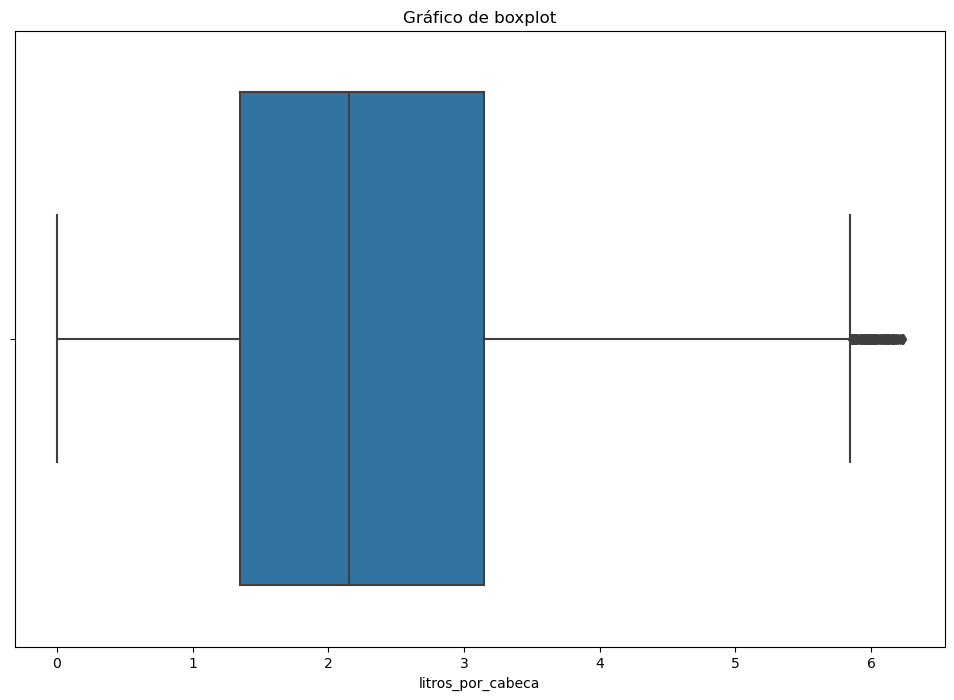

In [49]:
boxplot(x = df_limpo["litros_por_cabeca"])

#### Voltando a impressao dos dados

/tmp/ipykernel_37105/2553199722.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = x)


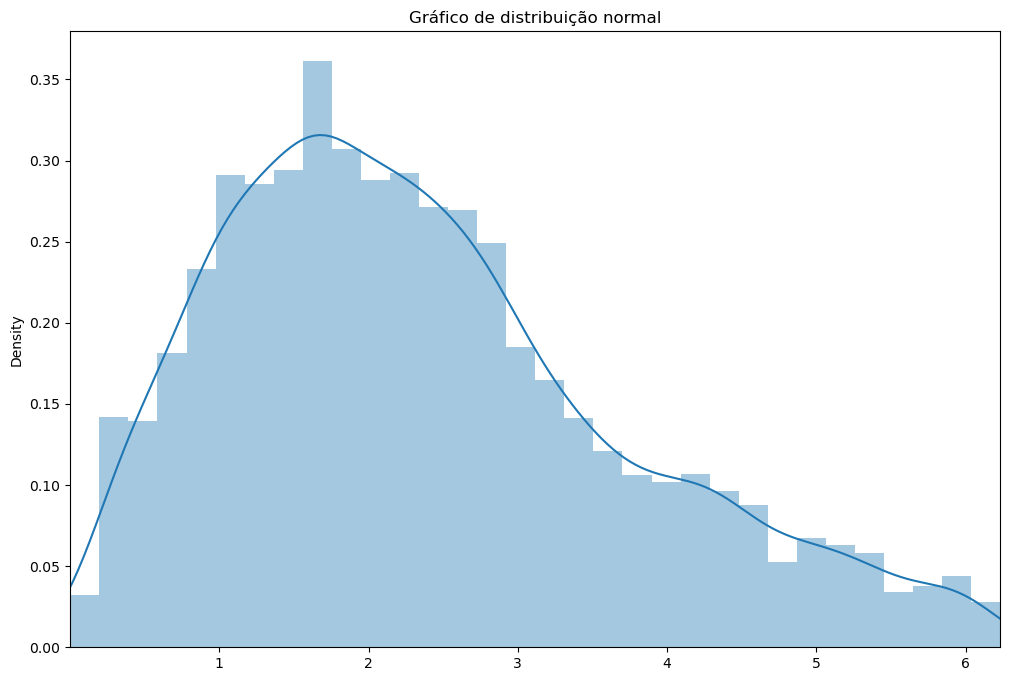

In [50]:
distribuicao_normal(x = df_limpo["litros_por_cabeca"])

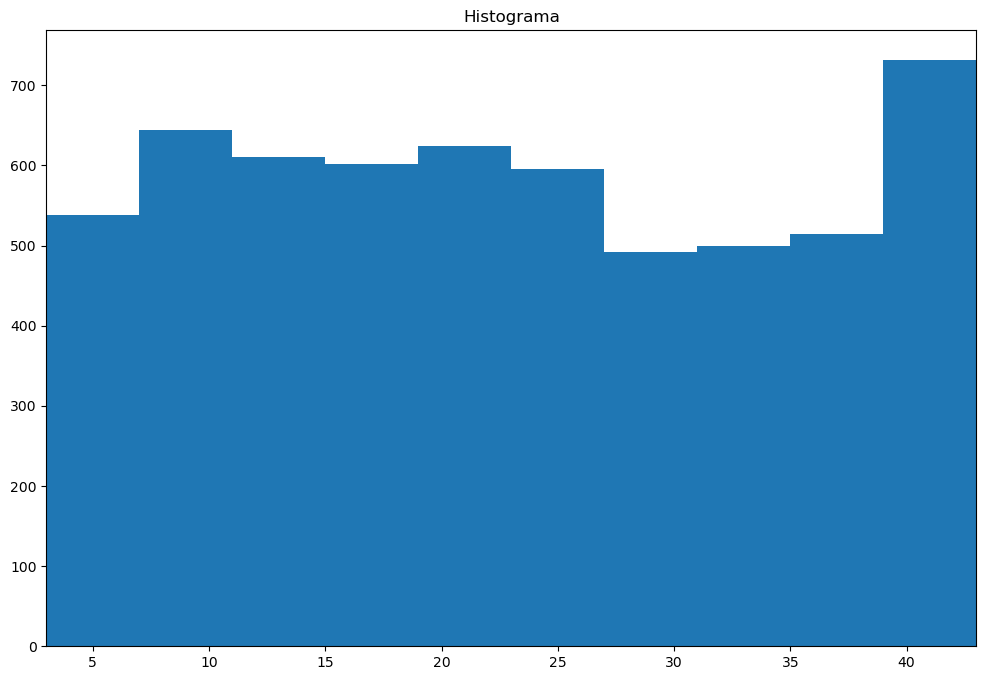

In [51]:
histograma(x = df_limpo["idade_animal"])

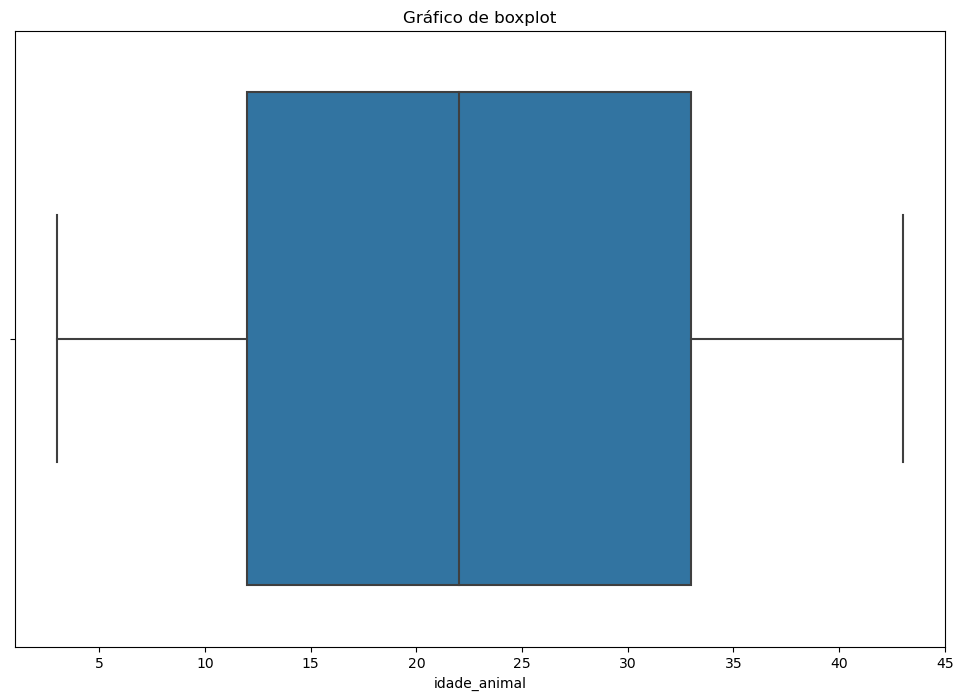

In [52]:
boxplot(x = df_limpo["idade_animal"])

/tmp/ipykernel_37105/2553199722.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = x)


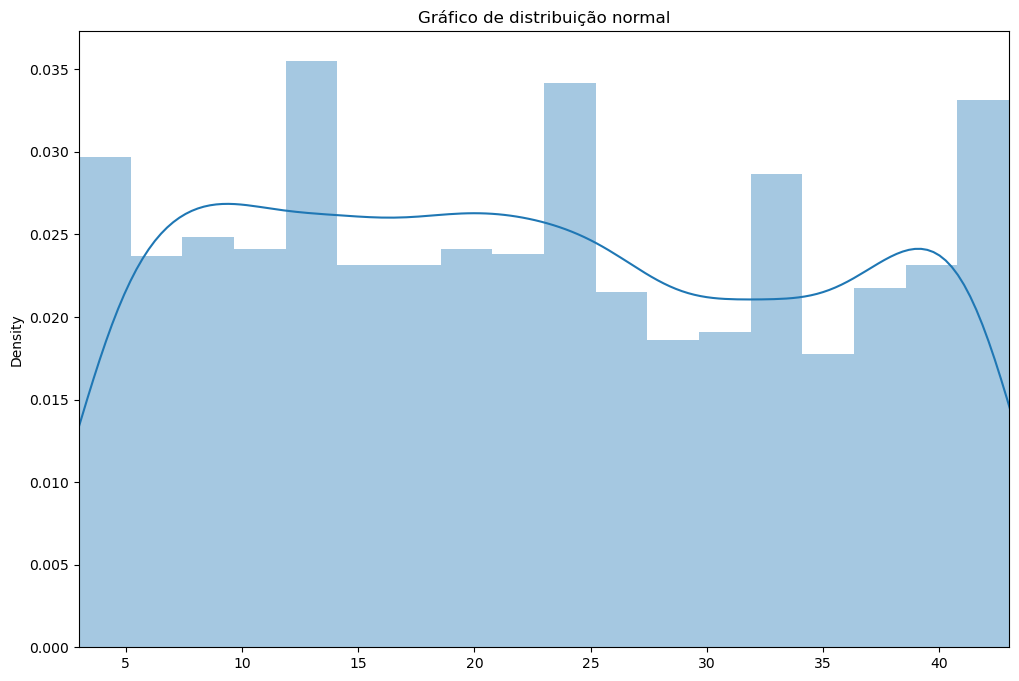

In [53]:
distribuicao_normal(x = df_limpo["idade_animal"])

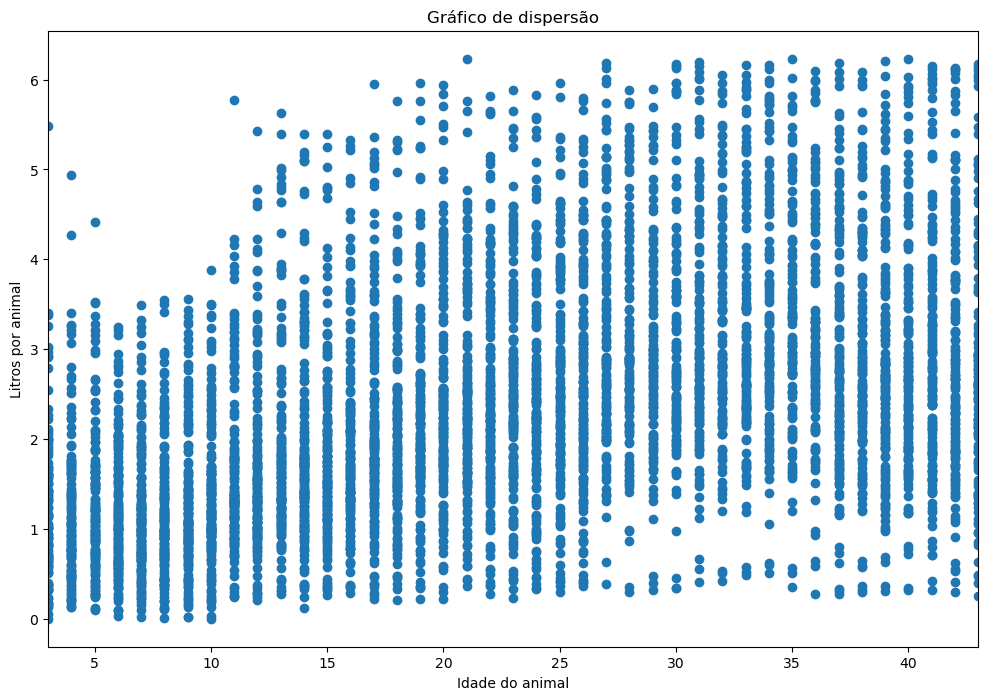

In [54]:
dispersao(
    y = df_limpo["litros_por_cabeca"],
    x = df_limpo["idade_animal"],
    xlabel = "Idade do animal",
    ylabel = "Litros por animal"
)

### Salvando o dataset limpo em um arquivo .pkl

In [55]:
df_limpo.to_pickle("datasets/processed/dataset-processado-limpo.pkl")

## Parte 1

### Como esta o dataset atual

In [56]:
df_limpo.sample(10)

dia_lote estacao_ano  idade_animal  litros_por_cabeca id_lote id_produto
183        26         pri            26           4.654336  339546        n_3
4574       40         pri            40           3.020909  637194        n_6
3582        8         inv             8           1.149177  438737        n_4
5203       19         ver            19           2.449388  535957        n_8
1839        7         pri             7           0.808930  501978        n_2
707        25         inv            25           2.741650  637193        n_3
4054       17         inv            17           1.653872  339039        n_6
4809       25         inv            25           2.861904  339084        n_7
3378       33         inv            33           5.922662  340032        n_4
4720        4         out             4           1.125949  902085        n_6

### Fazendo o pivoteamento do dataset

In [57]:
df_pivoteado = df_limpo.pivot_table(index="id_lote", columns = "dia_lote", values = "litros_por_cabeca")

#### Resultado do pivoteamento

In [58]:
df_pivoteado.sample(10)

dia_lote         3         4         5         6         7         8  \
id_lote                                                                
339545         NaN  1.923600  1.886053  2.167805  1.078008  2.724938   
582752    3.259315  3.271265  3.517846       NaN       NaN       NaN   
837020    2.965147  2.355594  2.542711  1.981360  1.118905  0.734877   
613466    0.765862  0.602332  0.992389  0.899044  0.889002  0.990188   
530999         NaN       NaN       NaN       NaN       NaN       NaN   
445237    0.180830  0.473070  0.594495  0.633855  1.084208  0.440912   
528115         NaN       NaN  1.037614  1.192187  1.230098  1.423285   
339544    3.379042  2.701410  1.715068  2.459088  2.489000  2.407515   
452725         NaN       NaN       NaN       NaN       NaN       NaN   
400085    3.406157  3.066037  3.219183  3.245300  3.330176  2.548266   

dia_lote         9        10        11        12  ...        34        35  \
id_lote                                           ...                       
339545    2.596581  2.664446  3.401880       NaN  ...       NaN       NaN   
582752         NaN       NaN       NaN       NaN  ...       NaN       NaN   
837020    0.799678  0.822180  1.025415  1.365075  ...  1.929403  1.840817   
613466    1.069754  1.173012  1.315459  1.296513  ...  2.100545  2.327608   
530999         NaN       NaN       NaN       NaN  ...  3.588943  3.327638   
445237    0.214350  0.306491  0.970579  1.069507  ...  3.663929  3.883137   
528115    1.521547  1.611128  1.786439       NaN  ...       NaN       NaN   
339544    2.561444  2.541369  3.248873  3.229835  ...       NaN       NaN   
452725         NaN       NaN       NaN       NaN  ...  2.971573  3.135259   
400085    2.483058  2.982871  2.257096       NaN  ...       NaN       NaN   

dia_lote        36        37        38        39        40        41  \
id_lote                                                                
339545         NaN  4.556512  4.930827  3.148162  1.777856  1.945445   
582752         NaN       NaN       NaN       NaN       NaN       NaN   
837020    1.765832  1.885961  1.775756  1.916905  1.456701       NaN   
613466    2.509426  2.256534  2.094936  2.247806  2.267834  2.198512   
530999    4.178960  3.213808  3.067409  2.659420  2.010220  2.384411   
445237    4.171458  4.195946       NaN  3.216511  2.212430       NaN   
528115         NaN       NaN       NaN       NaN       NaN       NaN   
339544         NaN       NaN       NaN  5.535018  5.861594  5.635472   
452725    3.433746  3.602816       NaN  3.729579  3.074531  2.127621   
400085         NaN       NaN       NaN       NaN       NaN       NaN   

dia_lote        42        43  
id_lote                       
339545    2.164016  1.857772  
582752         NaN       NaN  
837020         NaN  2.082149  
613466    2.276478  2.457055  
530999    2.330100  2.899111  
445237    2.593840  2.836834  
528115         NaN       NaN  
339544    5.823789  6.065083  
452725    2.127359  2.040605  
400085         NaN       NaN  

[10 rows x 41 columns]

O pivoteamento gerou diversos valores NaNs.

Vamos verificar sua quantidade e achar um possível valor para substituição.

### Substituindo os valores NaNs do dataset pivoteado

#### Quantidade de valores faltantes por coluna

In [59]:
df_pivoteado.isna().sum()

dia_lote
3     73
4     61
5     44
6     36
7     32
8     27
9     26
10    23
11    39
12    39
13    33
14    30
15    35
16    40
17    39
18    36
19    30
20    32
21    37
22    29
23    38
24    41
25    41
26    36
27    60
28    63
29    71
30    66
31    62
32    67
33    62
34    62
35    72
36    73
37    46
38    47
39    35
40    40
41    34
42    49
43    50
dtype: int64

Vamos remover os valores faltantes utilizando a média móvel.

Se utilizarmos a média total, ou a mediana total, nesse caso, iremos gerar outliers.

#### Removendo os valores faltantes

Vamos utlizar a média móvel para a atribuição de dados faltantes


Visializando o dataset original:

In [60]:
df_pivoteado.head(10)

dia_lote         3         4         5         6         7         8  \
id_lote                                                                
339039         NaN  1.768734  1.867669  1.675395  1.954148  2.379793   
339040         NaN       NaN  1.110390  0.994459  1.040993  1.119633   
339041    1.145028  0.933395  1.523945  1.206671  1.297428  1.392923   
339083    0.592304  1.318344  1.488223  1.580400  1.804873  1.926710   
339084    1.730569  1.676860  1.338435  1.758605  1.845718  1.923245   
339085    1.370917  0.930701  0.596879  1.598197  1.822402  2.277041   
339544    3.379042  2.701410  1.715068  2.459088  2.489000  2.407515   
339545         NaN  1.923600  1.886053  2.167805  1.078008  2.724938   
339546    1.511863  1.449944  1.452132  1.607852  1.579959  1.447910   
339985    1.422072  1.072365  1.115553  0.999461  1.279259  1.384913   

dia_lote         9        10        11        12  ...        34        35  \
id_lote                                           ...                       
339039    1.936753  1.293470  1.327862  1.268263  ...  4.738066  5.302024   
339040    1.178702  1.267142  1.315802  1.519834  ...  4.553810  4.410547   
339041    1.536658  1.652017  2.108097       NaN  ...  3.335186       NaN   
339083    1.862184  1.834145  2.313046  2.345171  ...       NaN       NaN   
339084    2.475163  2.047091  2.651210  3.186297  ...  5.727516  5.816275   
339085    2.215409  2.376667  2.660015  2.860442  ...       NaN       NaN   
339544    2.561444  2.541369  3.248873  3.229835  ...       NaN       NaN   
339545    2.596581  2.664446  3.401880       NaN  ...       NaN       NaN   
339546    1.748998  2.131425       NaN  2.544069  ...       NaN       NaN   
339985    1.388482  1.612733  1.749154  1.673997  ...  3.380748  2.963100   

dia_lote        36        37        38        39        40        41  \
id_lote                                                                
339039    3.200834  2.978749  2.476053  1.153956  1.178127  1.445388   
339040    3.864394  2.755256  3.238170  1.602191  1.766265  1.705054   
339041         NaN  1.933081  2.146159  2.822815  2.671208  3.583001   
339083         NaN  5.403673       NaN       NaN       NaN       NaN   
339084    5.985742  4.727516  4.952837  4.786983  4.490277  4.390076   
339085    5.879867       NaN  5.123641  5.719313  5.594835  6.020599   
339544         NaN       NaN       NaN  5.535018  5.861594  5.635472   
339545         NaN  4.556512  4.930827  3.148162  1.777856  1.945445   
339546         NaN       NaN       NaN  4.856086  4.839764  5.176429   
339985    2.393102       NaN  2.268596  2.761074  2.751193  2.383509   

dia_lote        42        43  
id_lote                       
339039    1.230691  1.241103  
339040    1.109573  1.109972  
339041    3.770095  2.600234  
339083         NaN       NaN  
339084    4.624108       NaN  
339085    5.408270       NaN  
339544    5.823789  6.065083  
339545    2.164016  1.857772  
339546    5.099962  5.389501  
339985         NaN  2.419473  

[10 rows x 41 columns]

Visualizando como seria o dataset com a média móvel calculada pelas colunas:

In [61]:
df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 0).mean()

dia_lote         3         4         5         6         7         8  \
id_lote                                                                
339039    1.145028  1.351064  1.500668  1.292175  1.430856  1.630783   
339040    0.868666  1.340158  1.497557  1.364231  1.524360  1.704765   
339041    1.155967  1.424333  1.465732  1.443106  1.588632  1.748461   
339083    1.209704  1.214825  1.211574  1.427667  1.562283  1.727910   
339084    1.643572  1.512142  1.332510  1.720592  1.851884  1.985487   
...            ...       ...       ...       ...       ...       ...   
869971    2.220633  1.952839  1.852292  1.774754  1.471845  1.383035   
880714    2.108527  1.950167  1.721817  1.669898  1.344181  1.275954   
902085    1.937655  1.673716  1.333151  1.326888  1.227528  1.201168   
912928    1.907552  1.861682  1.526697  1.387297  1.279481  1.274095   
916201    1.534359  1.346256  0.981655  0.798077  0.690420  0.529693   

dia_lote         9        10        11        12  ...        34        35  \
id_lote                                           ...                       
339039    1.550704  1.404210  1.583920  1.394048  ...  4.209020  4.856286   
339040    1.628574  1.511694  1.766202  1.711089  ...  4.209020  4.856286   
339041    1.797892  1.618773  1.943203  2.079891  ...  4.588644  5.176282   
339083    1.853623  1.835413  2.209634  2.477936  ...  4.538837  5.113411   
339084    2.130172  2.090258  2.596248  2.905436  ...  4.531351  5.816275   
...            ...       ...       ...       ...  ...       ...       ...   
869971    0.905750  0.792617  0.644458  0.702417  ...  1.760675  1.659651   
880714    0.900036  0.831327  0.736574  0.745287  ...  1.760675  1.659651   
902085    0.775214  0.833614  0.664364  0.590340  ...  1.687612  1.700562   
912928    0.895546  1.041283  0.800416  0.718119  ...  1.899913  1.869105   
916201    0.475742  0.736422  0.791320  0.697755  ...  1.073213  1.285472   

dia_lote        36        37        38        39        40        41  \
id_lote                                                                
339039    3.532614  2.555695  2.620127  1.859654  1.871867  2.244481   
339040    3.532614  3.267690  2.620127  1.859654  1.871867  2.244481   
339041    4.350323  3.559655  3.203304  2.591486  2.526469  2.780880   
339083    5.243334  3.704881  3.865201  3.732826  3.630646  3.924682   
339084    5.932804  4.021423  4.074212  4.716032  4.654478  4.907287   
...            ...       ...       ...       ...       ...       ...   
869971    1.663836  1.691102  1.686562  1.612574  1.716936  1.483301   
880714    1.663836  1.691102  1.686562  1.612574  1.716936  1.483301   
902085    1.748282  1.738278  1.656831  1.606680  1.885457  1.670824   
912928    1.889748  1.812593  1.595411  1.803015  1.888415  1.796376   
916201    1.374013  1.406388  0.587103  1.260459  1.424945  1.474017   

dia_lote        42        43  
id_lote                       
339039    2.036786  1.650436  
339040    2.036786  1.650436  
339041    2.683617  1.650436  
339083    3.728011  1.855103  
339084    4.906565  4.332658  
...            ...       ...  
869971    1.876899  2.191408  
880714    1.876899  1.981783  
902085    2.039081  2.117133  
912928    2.039081  2.392485  
916201    1.912649  2.277867  

[188 rows x 41 columns]

No caso do dataframe logo acima, sabemos que se houver dados faltantes nas 5 ultimas linhas, eles não serão substituidos por nenhum valor.

No dataframe abaixo, nós calculamos a média móvel por colunas:

In [62]:
df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 1).mean()

dia_lote         3         4         5         6         7         8  \
id_lote                                                                
339039    1.818202  1.770599  1.816487  1.929148  1.962752  1.847912   
339040    1.110390  1.052424  1.048614  1.066369  1.088835  1.120186   
339041    1.200789  1.202260  1.221293  1.270872  1.391525  1.417140   
339083    1.132957  1.244818  1.356829  1.623710  1.732478  1.801662   
339084    1.581955  1.626117  1.670037  1.708573  1.868233  2.009964   
...            ...       ...       ...       ...       ...       ...   
869971    1.179628  1.156033  1.128770  0.899048  0.773455  0.703784   
880714    3.198973  3.187969  3.159708  3.255742  3.005141  2.702977   
902085    1.034601  0.995313  0.936669  0.846333  0.696039  0.564240   
912928    1.599833  1.512493  1.376700  1.214206  1.001745  0.958995   
916201    1.227835  0.987453  0.897091  0.547122  0.387569  0.334616   

dia_lote         9        10        11        12  ...        34        35  \
id_lote                                           ...                       
339039    1.778405  1.641228  1.411409  1.231231  ...  3.982116  3.873807   
339040    1.184455  1.280223  1.384833  1.431204  ...  3.978429  3.841944   
339041    1.597425  1.672424  1.626122  1.581741  ...  4.651879  3.505311   
339083    1.948192  2.056251  2.173159  2.250902  ...  4.762909  5.385825   
339084    2.188485  2.456601  2.702466  2.876005  ...  5.718014  5.587005   
...            ...       ...       ...       ...  ...       ...       ...   
869971    0.537976  0.375433  0.258611  0.331674  ...  1.689619  1.268175   
880714    2.235707  1.778144  1.235398  1.100564  ...  3.271369  3.112229   
902085    0.484271  0.439601  0.452127  0.490464  ...  0.531950  0.596059   
912928    0.929907  0.946555  1.011384  1.046294  ...       NaN       NaN   
916201    0.357386  0.268258  0.175572       NaN  ...  1.845413  1.954972   

dia_lote        36        37        38        39        40        41  \
id_lote                                                                
339039    3.739145  3.022323  2.197544  1.846455  1.496843  1.249853   
339040    3.764435  3.174112  2.645255  2.213387  1.884251  1.458611   
339041    2.471475  2.300685  2.393316  2.631253  2.998656  3.089471   
339083    5.403673  5.403673  5.403673  5.403673       NaN       NaN   
339084    5.441977  5.253871  4.988671  4.669537  4.648856  4.572861   
...            ...       ...       ...       ...       ...       ...   
869971    1.372906  1.366300  1.502630  1.496686  1.492024  1.369876   
880714    2.947924  2.814887  2.770683  2.674659  2.608048  2.611648   
902085    0.609077  0.632740  0.663264  0.677310  0.822058  1.091075   
912928         NaN       NaN       NaN       NaN       NaN       NaN   
916201    1.954972  2.019017  2.050598  2.083043  2.155238  2.248900   

dia_lote        42        43  
id_lote                       
339039    1.273827  1.305727  
339040    1.422716  1.308200  
339041    3.156134  3.317777  
339083         NaN       NaN  
339084    4.501487  4.507092  
...            ...       ...  
869971    1.487277  1.292623  
880714    2.542528  2.451587  
902085    1.206946  1.369559  
912928         NaN       NaN  
916201    2.337793  2.406796  

[188 rows x 41 columns]

No caso do dataframe logo acima, sabemos que se houver dados faltantes nas 5 ultimas colunas, eles não serão substituidos por nenhum valor.

No dataframe abaixo, nós calculamos a média móvel por uma mescla das linhas pelas colunas, isso deixa a existência de valores faltantes muito baixa de ocorrer:

In [63]:
df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 1).mean().fillna(df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 0).mean())

dia_lote         3         4         5         6         7         8  \
id_lote                                                                
339039    1.818202  1.770599  1.816487  1.929148  1.962752  1.847912   
339040    1.110390  1.052424  1.048614  1.066369  1.088835  1.120186   
339041    1.200789  1.202260  1.221293  1.270872  1.391525  1.417140   
339083    1.132957  1.244818  1.356829  1.623710  1.732478  1.801662   
339084    1.581955  1.626117  1.670037  1.708573  1.868233  2.009964   
...            ...       ...       ...       ...       ...       ...   
869971    1.179628  1.156033  1.128770  0.899048  0.773455  0.703784   
880714    3.198973  3.187969  3.159708  3.255742  3.005141  2.702977   
902085    1.034601  0.995313  0.936669  0.846333  0.696039  0.564240   
912928    1.599833  1.512493  1.376700  1.214206  1.001745  0.958995   
916201    1.227835  0.987453  0.897091  0.547122  0.387569  0.334616   

dia_lote         9        10        11        12  ...        34        35  \
id_lote                                           ...                       
339039    1.778405  1.641228  1.411409  1.231231  ...  3.982116  3.873807   
339040    1.184455  1.280223  1.384833  1.431204  ...  3.978429  3.841944   
339041    1.597425  1.672424  1.626122  1.581741  ...  4.651879  3.505311   
339083    1.948192  2.056251  2.173159  2.250902  ...  4.762909  5.385825   
339084    2.188485  2.456601  2.702466  2.876005  ...  5.718014  5.587005   
...            ...       ...       ...       ...  ...       ...       ...   
869971    0.537976  0.375433  0.258611  0.331674  ...  1.689619  1.268175   
880714    2.235707  1.778144  1.235398  1.100564  ...  3.271369  3.112229   
902085    0.484271  0.439601  0.452127  0.490464  ...  0.531950  0.596059   
912928    0.929907  0.946555  1.011384  1.046294  ...  1.899913  1.869105   
916201    0.357386  0.268258  0.175572  0.697755  ...  1.845413  1.954972   

dia_lote        36        37        38        39        40        41  \
id_lote                                                                
339039    3.739145  3.022323  2.197544  1.846455  1.496843  1.249853   
339040    3.764435  3.174112  2.645255  2.213387  1.884251  1.458611   
339041    2.471475  2.300685  2.393316  2.631253  2.998656  3.089471   
339083    5.403673  5.403673  5.403673  5.403673  3.630646  3.924682   
339084    5.441977  5.253871  4.988671  4.669537  4.648856  4.572861   
...            ...       ...       ...       ...       ...       ...   
869971    1.372906  1.366300  1.502630  1.496686  1.492024  1.369876   
880714    2.947924  2.814887  2.770683  2.674659  2.608048  2.611648   
902085    0.609077  0.632740  0.663264  0.677310  0.822058  1.091075   
912928    1.889748  1.812593  1.595411  1.803015  1.888415  1.796376   
916201    1.954972  2.019017  2.050598  2.083043  2.155238  2.248900   

dia_lote        42        43  
id_lote                       
339039    1.273827  1.305727  
339040    1.422716  1.308200  
339041    3.156134  3.317777  
339083    3.728011  1.855103  
339084    4.501487  4.507092  
...            ...       ...  
869971    1.487277  1.292623  
880714    2.542528  2.451587  
902085    1.206946  1.369559  
912928    2.039081  2.392485  
916201    2.337793  2.406796  

[188 rows x 41 columns]

Visualmente, no dataframe acima não há nenhum valor faltante, vamos provar isso:

In [64]:
df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 1).mean()\
    .fillna(df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 0).mean()).isna().sum()

dia_lote
3     0
4     2
5     1
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    1
30    1
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
dtype: int64

Como é possivel visualizar acima, ainda possuímos 5 valores não numéricos.

Os valores estão disposta na colunas *4*, *5*, *29* e *30*.

Sendo 1 nas colunas *4*, *29* e *30*, e 2 na coluna *5*.

Vamos realizar a substituição pela média móvel, por coluna, mais uma vez:

In [65]:
df_pivoteado = df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 1).mean()\
    .fillna(df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 0).mean())

In [66]:
df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 1).mean()\
    .fillna(df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 0).mean()).isna().sum()

dia_lote
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
dtype: int64

Agora que provamos que não teremos valores faltantes, vamos fazer a mudança em nosso dataframe de trabalho:

In [67]:
df_pivoteado = df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 1).mean()\
    .fillna(df_pivoteado.rolling(window = 5, min_periods = 1, center = True, axis = 0).mean())

Uma amostra dos dados:

In [68]:
df_pivoteado.sample(10)

dia_lote         3         4         5         6         7         8  \
id_lote                                                                
744887    0.370280  0.353409  0.334787  0.301149  0.277412  0.260518   
340033    1.257733  1.248139  1.236902  1.241566  1.231301  1.197140   
339544    2.570293  2.516324  2.478344  2.456979  2.474177  2.523994   
407732    0.676382  0.748447  0.825490  0.978365  1.125352  1.296151   
525611    0.926821  0.956732  0.986964  1.014259  1.117813  1.210940   
916201    1.037460  0.914875  0.809414  0.630770  0.504757  0.378990   
340154    1.320460  1.395899  1.679562  1.872912  2.061746  2.173452   
637193    1.180420  1.169669  1.171761  1.166410  1.176073  1.208810   
755669    0.529962  0.510376  0.491838  0.469437  0.467623  0.484240   
483807    0.775147  0.752245  0.734573  0.711328  0.673763  0.671373   

dia_lote         9        10        11        12  ...        34        35  \
id_lote                                           ...                       
744887    0.255365  0.264281  0.281963  0.300397  ...  2.854047  2.399674   
340033    1.218441  1.257957  1.307058  1.393915  ...  3.926118  4.089558   
339544    2.669426  2.886243  3.133207  3.399631  ...  5.620669  5.671619   
407732    1.492939  1.724944  1.977088  2.252441  ...  3.867997  3.836438   
525611    1.311171  1.420867  1.528005  1.635210  ...  2.839984  2.762125   
916201    0.304680  0.366717  0.461285  0.613884  ...  1.820835  1.899187   
340154    2.277730  2.009489  2.096029  2.197461  ...  5.443236  5.524966   
637193    1.269432  1.340021  1.437544  1.550107  ...  3.713071  3.808654   
755669    0.526762  0.600426  0.673301  0.737489  ...  2.165638  2.070829   
483807    0.717941  0.806437  0.914516  1.032556  ...  2.934611  2.881152   

dia_lote        36        37        38        39        40        41  \
id_lote                                                                
744887    2.049168  2.036991  2.076146  2.434097  2.840447  2.987048   
340033    4.226047  4.303049  4.246023  3.918374  3.629783  3.367716   
339544    5.741984  5.731953  5.711492  5.681769  5.744062  5.772691   
407732    3.778344  3.633573  3.457592  3.305846  3.101604  2.755221   
525611    2.680590  2.603153  2.566603  2.579098  2.628392  2.692476   
916201    1.964994  2.012520  2.052573  2.111359  2.175114  2.246354   
340154    5.680697  5.807061  5.686427  5.486559  5.286690  5.052467   
637193    3.824792  3.618038  3.356201  3.084470  2.836575  2.632395   
755669    2.002034  1.901875  1.833088  1.865287  1.921082  1.966155   
483807    2.854996  2.818352  2.790221  2.707139  2.635548  2.523055   

dia_lote        42        43  
id_lote                       
744887    3.327997  3.826967  
340033    3.216916  3.056975  
339544    5.796523  5.824041  
407732    2.623552  2.509513  
525611    2.739377  2.778494  
916201    2.287182  2.331163  
340154    4.813900  4.714858  
637193    2.563752  2.523336  
755669    1.989955  2.040804  
483807    2.471412  2.409314  

[10 rows x 41 columns]

### Salvando o dataset pivoteado e limpo em um arquivo .pkl

In [69]:
df_pivoteado.to_pickle("datasets/processed/dataset-pivoteado-limpo.pkl")

### Agrupando o dataframe

#### Selecionando o melhor parâmetro

##### Atribuindo a quantidade de clusters que serão utilizados

In [70]:
nro_de_cluster = [i for i in range(2, 13)]
print("Conteúdo da lista: ", nro_de_cluster)
print("Seu tipo é: ", type(nro_de_cluster))

Conteúdo da lista:  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Seu tipo é:  <class 'list'>


##### Atribuindo o número de vezes que o algoritmo irá rodar com diferentes centroides

In [71]:
qtd_de_rodadas = [i for i in range(10, 130, 10)]
print("Conteúdo da lista: ", qtd_de_rodadas)
print("Seu tipo é: ", type(qtd_de_rodadas))

Conteúdo da lista:  [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
Seu tipo é:  <class 'list'>


##### Lista auxiliar para a escolha dos melhores parâmetros

In [72]:
melhores_parametros = {
    "numero_de_clusters" : 1,
    "quantidade_de_rodadas" : 9,
    "Score" : 0
}

print(melhores_parametros)

{'numero_de_clusters': 1, 'quantidade_de_rodadas': 9, 'Score': 0}


##### Seleção do parâmetro

In [73]:
qtd_de_rodadas.append("auto")

In [74]:
def atualiza_dicionario(melhores_parametros:dict, nro_cluster:int, rodada:int, score_atual:float) -> dict:
    melhores_parametros = {
        "numero_de_clusters" : nro_cluster,
        "quantidade_de_rodadas" : rodada,
        "Score" : score_atual
    }
    
    return melhores_parametros

In [75]:
for nro_cluster in nro_de_cluster:
    for rodada in qtd_de_rodadas:
        kmeans = KMeans(
                        n_clusters = nro_cluster,
                        n_init = rodada,
                        random_state = 50 # deixando a SEED manual para futuras observacoes
                    )
        kmeans.fit(df_pivoteado)
        
        # usando o silhouette para pegar os score de forma limpa
        score_atual = silhouette_score(df_pivoteado, kmeans.labels_)
        
        # salvando os melhores parametros
        if score_atual > melhores_parametros["Score"]:
            melhores_parametros = atualiza_dicionario(melhores_parametros, nro_cluster, rodada, score_atual)
    
melhores_parametros

{'numero_de_clusters': 2,
 'quantidade_de_rodadas': 10,
 'Score': 0.47665675971555743}

#### Agrupando com o modelo KMeans e os melhores resultados demonstrados anteriormente

##### Número máximo de iterações

In [76]:
maximo_de_iteracoes = 1200

##### Treinando o modelo

In [77]:
kmeans = KMeans(
            n_clusters = melhores_parametros["numero_de_clusters"],
            n_init = melhores_parametros["quantidade_de_rodadas"],
            max_iter = maximo_de_iteracoes,
            random_state = 50 # deixando a SEED manual para futuras observacoes
        )
kmeans.fit(df_pivoteado)

KMeans(max_iter=1200, n_clusters=2, n_init=10, random_state=50)

#### Resultado da previsão

In [78]:
y_predicao = kmeans.predict(df_pivoteado)
print(len(y_predicao))
print(y_predicao)

188
[1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


#### Visualizando as classes e suas ocorrências

In [79]:
classes, quantidade = np.unique(y_predicao, return_counts = True)

for i in range(0, len(classes)):
    print(f"Para a classe {classes[i]}, existem {quantidade[i]} ocorrências.")

Para a classe 0, existem 56 ocorrências.
Para a classe 1, existem 132 ocorrências.


#### Visualizando as classes de forma gráfica

##### Relembrando os nomes das colunas

In [80]:
df_limpo.columns

Index(['dia_lote', 'estacao_ano', 'idade_animal', 'litros_por_cabeca',
       'id_lote', 'id_produto'],
      dtype='object')

##### Os centróides

In [81]:
centroides = kmeans.cluster_centers_
centroides

array([[1.81338081, 1.8215393 , 1.83726054, 1.86948544, 1.93353979,
        2.01089222, 2.14298374, 2.2991097 , 2.48252067, 2.66298376,
        2.84178338, 2.98781229, 3.12632528, 3.25141828, 3.36839543,
        3.486108  , 3.60343042, 3.7074363 , 3.79138148, 3.85691483,
        3.92295418, 4.00165339, 4.10232027, 4.23328614, 4.36725333,
        4.46223466, 4.54789637, 4.60516374, 4.61954243, 4.62242843,
        4.6689387 , 4.69409176, 4.68690679, 4.6515725 , 4.60328613,
        4.50173775, 4.41085242, 4.33977763, 4.27790021, 4.24626436,
        4.23940877],
       [1.03899703, 1.03406966, 1.03299136, 1.01801918, 1.02122906,
        1.04420054, 1.08427197, 1.13657015, 1.21572195, 1.29436482,
        1.3713273 , 1.43117349, 1.4940365 , 1.54374808, 1.60146842,
        1.66149777, 1.74000226, 1.80649866, 1.87426975, 1.93098566,
        1.99007121, 2.04483829, 2.13087053, 2.22828927, 2.35824863,
        2.46470866, 2.56119794, 2.62532081, 2.68842552, 2.72073477,
        2.73540989, 2.73571

#### Separando os clusters

##### Criando uma coluna extra para salvar as classes de cada lote

In [82]:
df_pivoteado["classe"] = kmeans.labels_

In [83]:
df_pivoteado.sample(5)

dia_lote         3         4         5         6         7         8  \
id_lote                                                                
339041    1.208114  1.223804  1.257348  1.300618  1.379651  1.469877   
731535    0.597305  0.604090  0.619827  0.644099  0.673673  0.701565   
569700    0.522332  0.552938  0.628761  0.648382  0.902127  1.184615   
474020    1.302919  1.221719  1.173569  0.994080  0.975758  0.955232   
762905    1.930901  1.904563  1.956850  1.958595  1.921449  1.873327   

dia_lote         9        10        11        12  ...        35        36  \
id_lote                                           ...                       
339041    1.540927  1.578970  1.585028  1.534043  ...  3.411681  3.064533   
731535    0.741044  0.777712  0.829022  0.881069  ...  3.427349  2.909988   
569700    1.526571  1.708101  1.938293  2.127591  ...  2.275270  2.246971   
474020    0.933009  0.904941  0.881325  0.886064  ...  3.521787  3.495824   
762905    1.822033  1.600649  1.393951  1.218489  ...  3.805822  3.443230   

dia_lote        37        38        39        40        41        42  \
id_lote                                                                
339041    2.660408  2.559077  2.682676  2.853766  3.038658  3.140509   
731535    2.460358  2.222992  2.250683  2.336749  2.430805  2.468588   
569700    2.225380  2.227687  2.260617  2.320923  2.389149  2.427725   
474020    3.462629  3.421751  3.370701  3.308256  3.236847  3.195681   
762905    3.055966  2.618301  2.151425  1.716972  1.728478  1.723421   

dia_lote        43  classe  
id_lote                     
339041    3.187794       1  
731535    2.490887       1  
569700    2.465390       1  
474020    3.135130       1  
762905    1.699217       1  

[5 rows x 42 columns]

* dados_classe_1: os dados filtrados que pertencem a classe 0 predita no kmeans

* dados_classe_2: os dados filtrados que pertencem a classe 1 predita no kmeans

In [84]:
dados_classe_1 = df_pivoteado[df_pivoteado.classe == 0].drop(columns = "classe")
dados_classe_2 = df_pivoteado[df_pivoteado.classe == 1].drop(columns = "classe")

#### Imprimindo o gráfico

##### Gráfico de linhas

Em todos os gráficos, a linha (mais grossa) é o centroide para a classe em questão

###### Classe 0

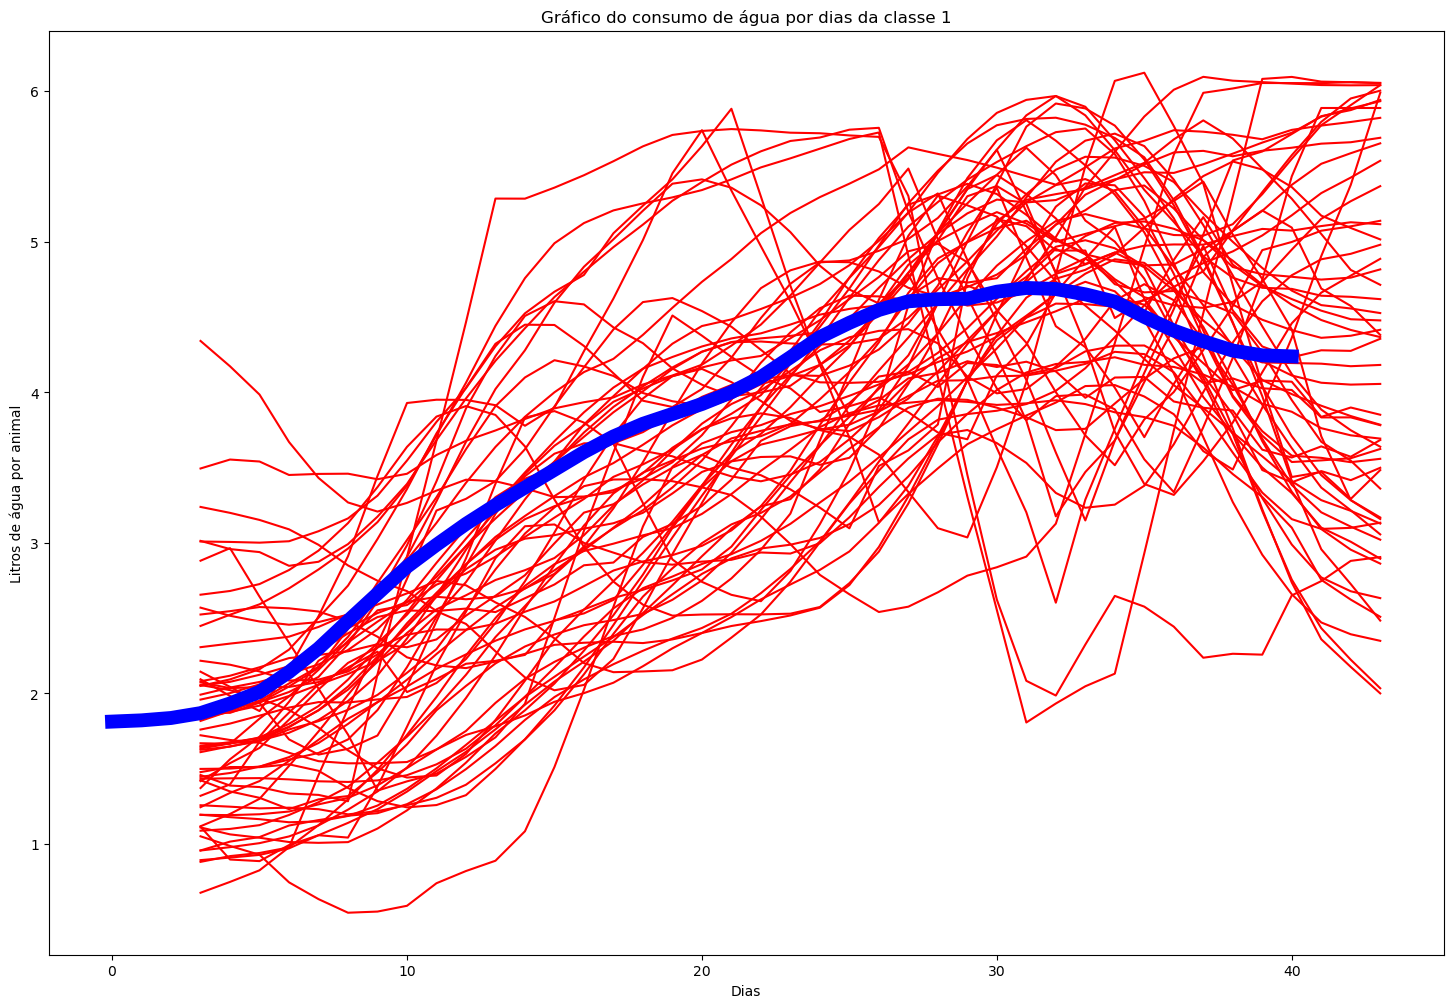

In [85]:
figura = plt.figure(figsize = (18, 12))

for indice in dados_classe_1.index:
     sns.lineplot(dados_classe_1.loc[indice], color = "r")
     
sns.lineplot(centroides[0], linewidth = 10, color = "b")
plt.title("Gráfico do consumo de água por dias da classe 1")    
plt.xlabel("Dias")
plt.ylabel("Litros de água por animal")
plt.show()


###### Classe 1:

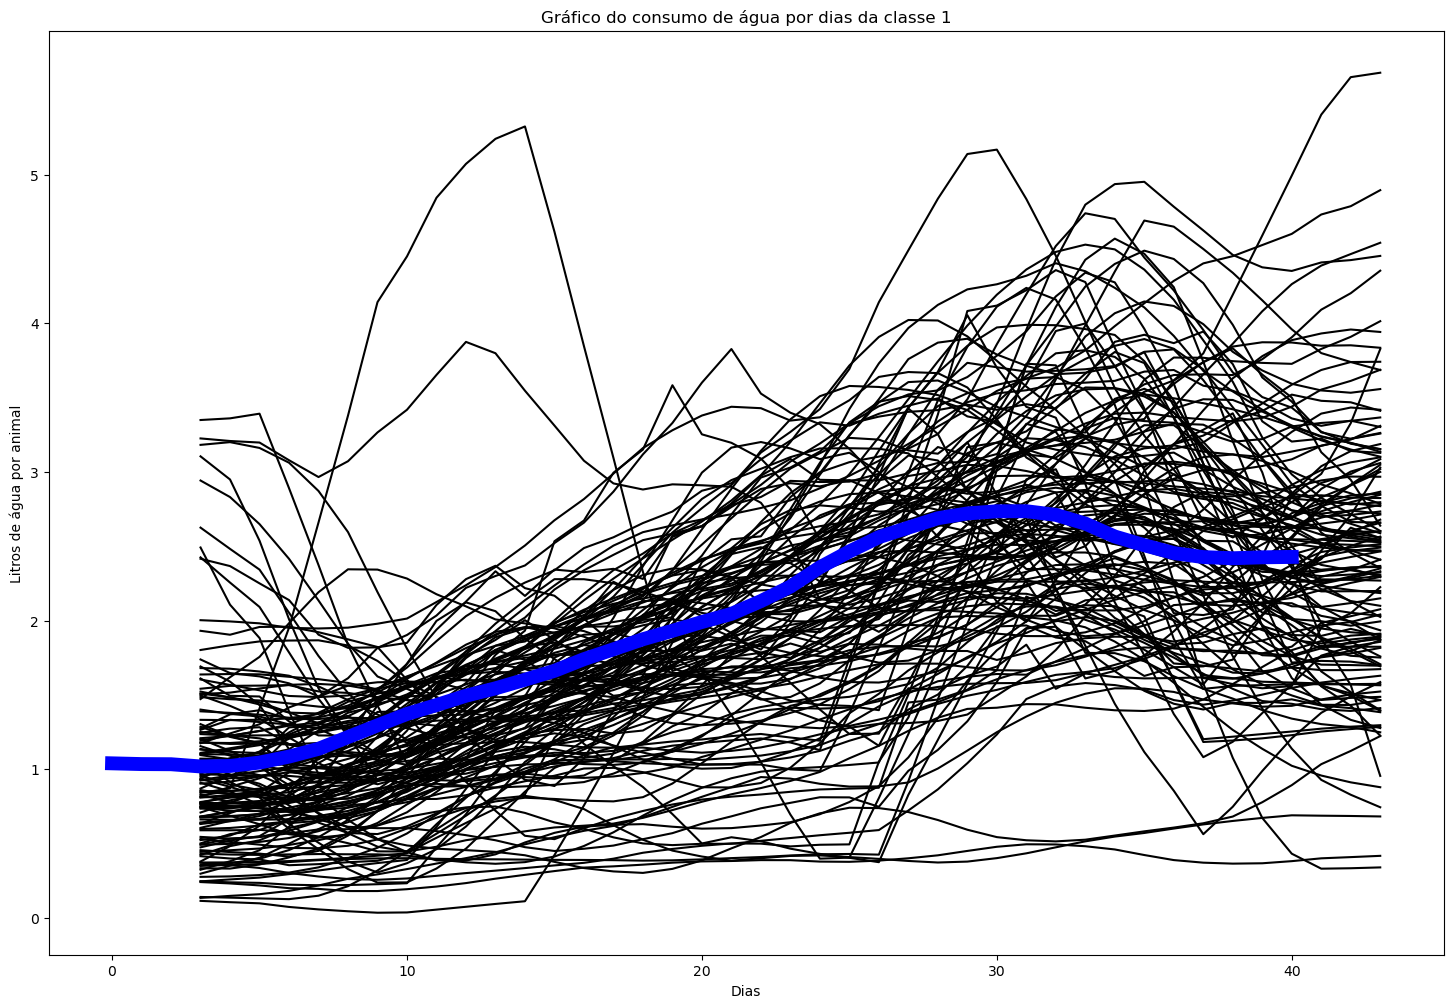

In [86]:
figura = plt.figure(figsize = (18, 12))

for indice in dados_classe_2.index:
     sns.lineplot(dados_classe_2.loc[indice], color = "black")

sns.lineplot(centroides[1], linewidth = 10, color = "b")
plt.title("Gráfico do consumo de água por dias da classe 2")
plt.xlabel("Dias")
plt.ylabel("Litros de água por animal")
plt.show()


##### Gráfico de dispersão

###### Classe 0

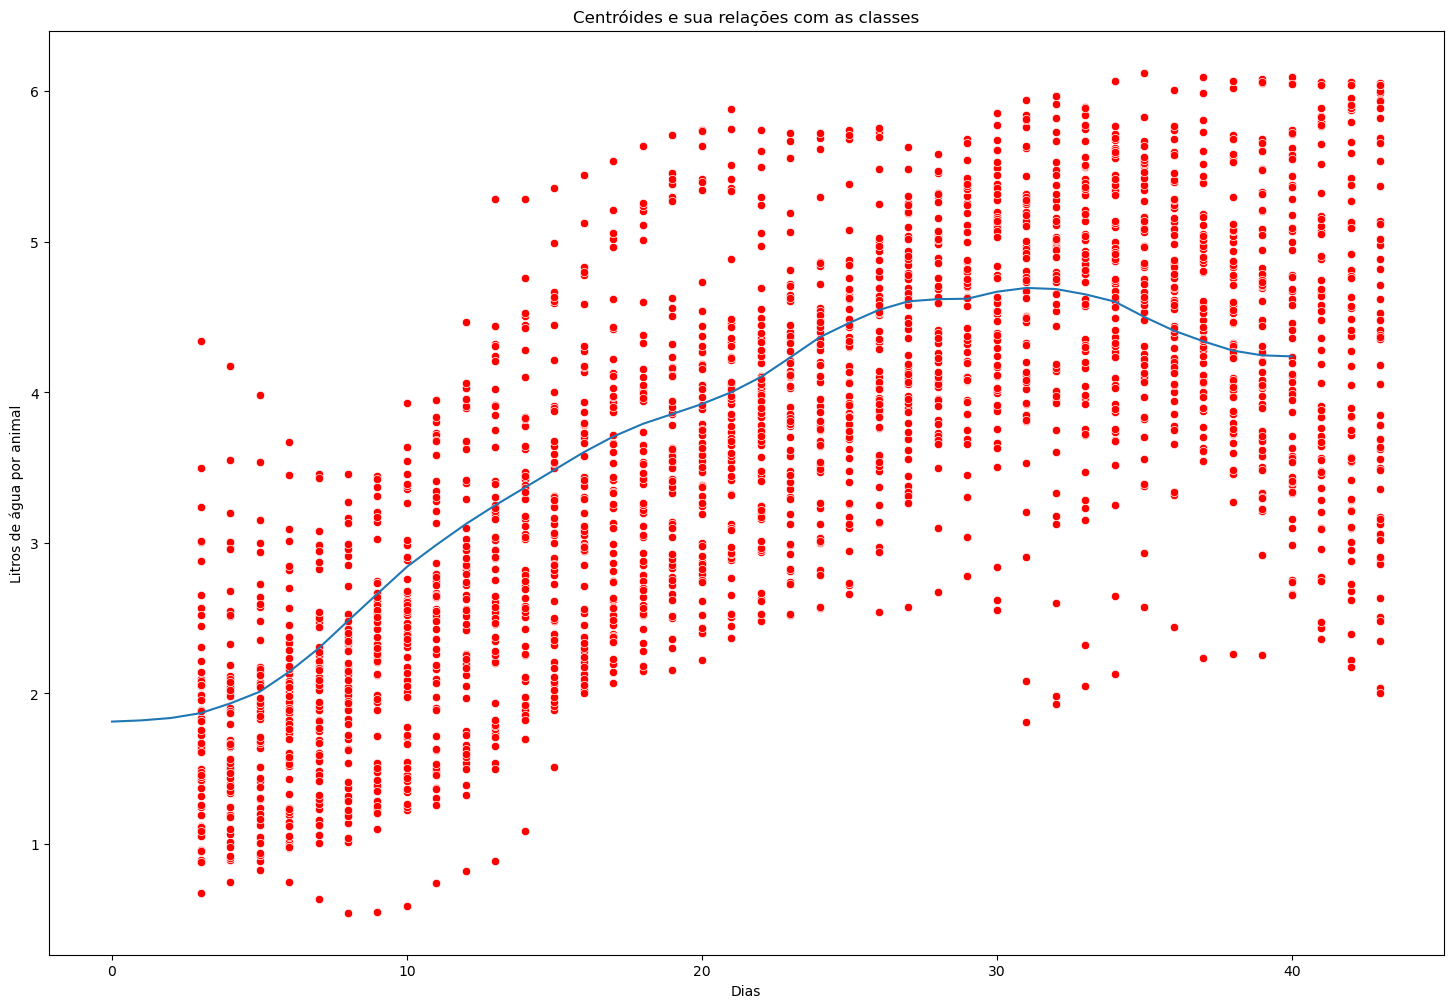

In [87]:
figura = plt.figure(figsize = (18, 12))
plt.plot(centroides[0])
for indice in dados_classe_1.index:
     sns.scatterplot(dados_classe_1.loc[indice], color = "r")
plt.title("Centróides e sua relações com as classes")
plt.xlabel("Dias")
plt.ylabel("Litros de água por animal")
plt.show()

###### Classe 1:

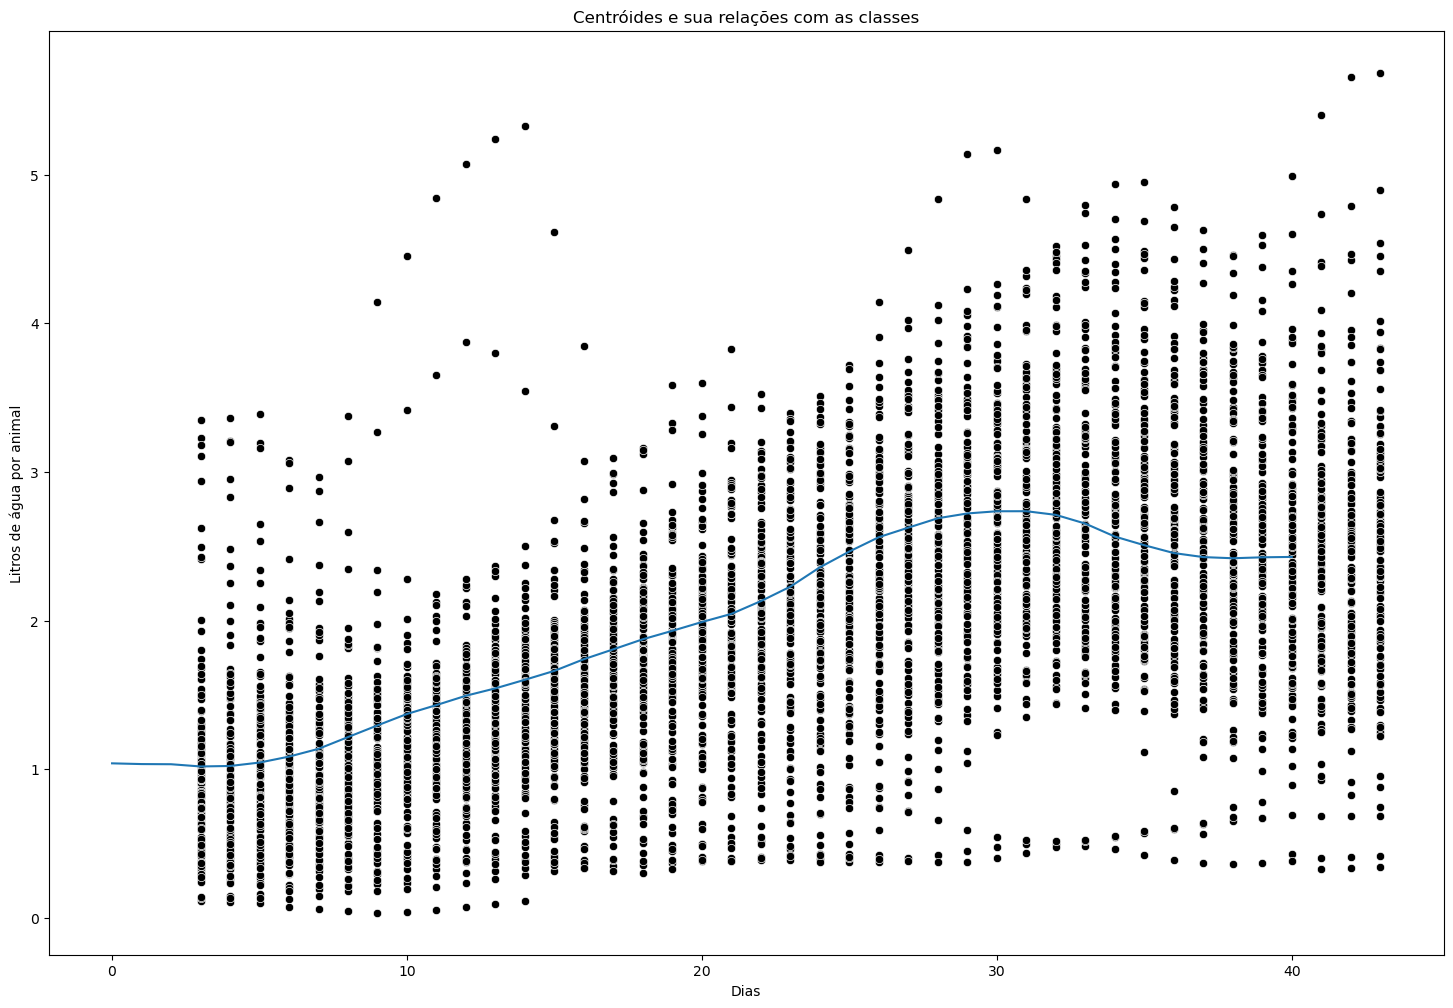

In [88]:
figura = plt.figure(figsize = (18, 12))
plt.plot(centroides[1])
for indice in dados_classe_2.index:
     sns.scatterplot(dados_classe_2.loc[indice], color = "black")
plt.title("Centróides e sua relações com as classes")
plt.xlabel("Dias")
plt.ylabel("Litros de água por animal")
plt.show()

## Parte 2

### Importando o dataset

In [89]:
df_lotes_filtrados_raw = pd.read_csv(filepath_or_buffer = "./datasets/raw/Lots_filtered.csv", sep = ",")

#### Mostrado um exemplo do dataframe

In [90]:
df_lotes_filtrados_raw.sample(10)

Unnamed: 0  lot_id  total_input  mortality  input_age  output_age  \
138         205  583162         2433   2.548294       21.0        72.0   
85           99  794858         3485   1.750359       21.0        75.0   
150         217  499077         5183   2.951958       21.0        67.0   
186         481  629632         2981   2.247568       21.0        72.0   
109         134  388793         5543   2.309219       21.0        64.0   
57           69  622513         4166   1.176188       21.0        67.0   
30           32  571905         6840   1.959064       21.0        70.0   
181         308  716383         5974   7.700033       21.0       105.0   
80           94  629638         3374   1.244813       21.0        73.0   
82           96  712035         3444   0.842044       21.0        72.0   

     input_weight  output_weight  daily_weight_gain  daily_feed_per_animal  \
138      7.592195      25.166639           0.344597               0.126694   
85       7.576657      29.468534           0.405405               0.407797   
150      7.305126      23.028773           0.341818               0.496326   
186      7.671016      24.974811           0.339290               0.242777   
109      7.671274      21.529972           0.322295               0.453263   
57       7.721877      23.366553           0.340102               0.467415   
30       7.734487      24.711795           0.346476               0.492097   
181      7.530485      25.067798           0.208778               0.362411   
80       7.663918      23.808523           0.310473               0.476037   
82       7.633246      29.232679           0.423518               0.576465   

     adjusted_feed_conversion_ratio  days_in_stage  
138                        0.365993             52  
85                         0.961214             55  
150                        1.471730             47  
186                        0.715795             52  
109                        1.441059             44  
57                         1.390674             47  
30                         1.423174             50  
181                        1.735193             85  
80                         1.545176             53  
82                         1.318806             52

### Renomeando as colunas do dataframe

#### Lista com as colunas

In [91]:
colunas_renomear = {
    "lot_id" : "id_lote",
    "total_input" : "qtd_animal_inicial",
    "mortality" : "mortalidade",
    "input_age" : "idade_inicial",
    "output_age" : "idade_final",
    "input_weight" : "peso_inicial",
    "output_weight" : "peso_final",
    "daily_weight_gain" : "ganho_peso_diario",
    "daily_feed_per_animal" : "alimento_diario_animal",
    "adjusted_feed_conversion_ratio" : "proporcao_alimento_ajustada",
    "days_in_stage" : "dias_no_galpao"
}

#### Renomeando

In [92]:
df_lotes_filtrados_processed = df_lotes_filtrados_raw.rename(columns = colunas_renomear)

### Limpando o dataframe

#### Excluido coluna *Unnamed: 0*

In [93]:
df_lotes_filtrados_processed = df_lotes_filtrados_processed.drop(columns = ["Unnamed: 0"])

In [94]:
df_lotes_filtrados_processed.sample(10)

id_lote  qtd_animal_inicial  mortalidade  idade_inicial  idade_final  \
122   832521                1992     3.162651           21.0         76.0   
82    712035                3444     0.842044           21.0         72.0   
133   486166                2153     2.415235           21.0         70.0   
96    489709                4117     2.647559           21.0         73.0   
111   389469                3168     2.178030           21.0         67.0   
119   407732                1895     2.427441           21.0         68.0   
187   653495                2991     2.741558           21.0         70.0   
154   569700                3451     2.144306           21.0         64.0   
101   586886                4172     2.013423           21.0         71.0   
126   589872               10620     1.572505           21.0         69.0   

     peso_inicial  peso_final  ganho_peso_diario  alimento_diario_animal  \
122      7.599438   34.847797           0.495425                0.753853   
82       7.633246   29.232679           0.423518                0.576465   
133      7.848681   22.590338           0.300850                0.497450   
96       7.622363   21.413715           0.265218                0.381808   
111      7.577475   21.230074           0.296796                0.417526   
119      7.673567   21.995738           0.304727                0.402034   
187      7.643852   25.505706           0.364528                0.362001   
154      7.597737   24.263044           0.387565                0.571307   
101      7.755328   24.286057           0.330615                0.472603   
126      8.075162   23.732627           0.326197                0.461132   

     proporcao_alimento_ajustada  dias_no_galpao  
122                     1.423151              56  
82                      1.318806              52  
133                     1.677578              50  
96                      1.475464              53  
111                     1.444479              47  
119                     1.349369              48  
187                     0.988012              50  
154                     1.481461              44  
101                     1.436607              51  
126                     1.426333              49

#### Eliminando valores faltantes

##### Verificando os valores faltantes por coluna

In [95]:
df_lotes_filtrados_processed.isna().sum()

id_lote                         0
qtd_animal_inicial              0
mortalidade                     0
idade_inicial                   0
idade_final                     0
peso_inicial                    0
peso_final                      0
ganho_peso_diario               0
alimento_diario_animal         12
proporcao_alimento_ajustada    12
dias_no_galpao                  0
dtype: int64

##### Substituindo os valores faltantes pela mediana da coluna

###### Coluna *alimento_diario_animal*

In [96]:
mediana = df_lotes_filtrados_processed["alimento_diario_animal"].median()
mediana

0.45562833739088326

In [97]:
df_lotes_filtrados_processed["alimento_diario_animal"] = df_lotes_filtrados_processed["alimento_diario_animal"].fillna(mediana)
df_lotes_filtrados_processed["alimento_diario_animal"].isna().sum()

0

###### Coluna *proporcao_alimento_ajustada*

In [98]:
mediana = df_lotes_filtrados_processed["proporcao_alimento_ajustada"].median()
mediana

1.4212981096053308

In [99]:
df_lotes_filtrados_processed["proporcao_alimento_ajustada"] = df_lotes_filtrados_processed["proporcao_alimento_ajustada"].fillna(mediana)
df_lotes_filtrados_processed["proporcao_alimento_ajustada"].isna().sum()

0

#### Eliminando outliers

In [100]:
colunas = [
    "qtd_animal_inicial",
    "mortalidade",
    "idade_inicial",
    "idade_final",
    "peso_inicial",
    "peso_final",
    "ganho_peso_diario",
    "alimento_diario_animal",
    "proporcao_alimento_ajustada"
]

/tmp/ipykernel_37105/491048045.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3, 3, i)


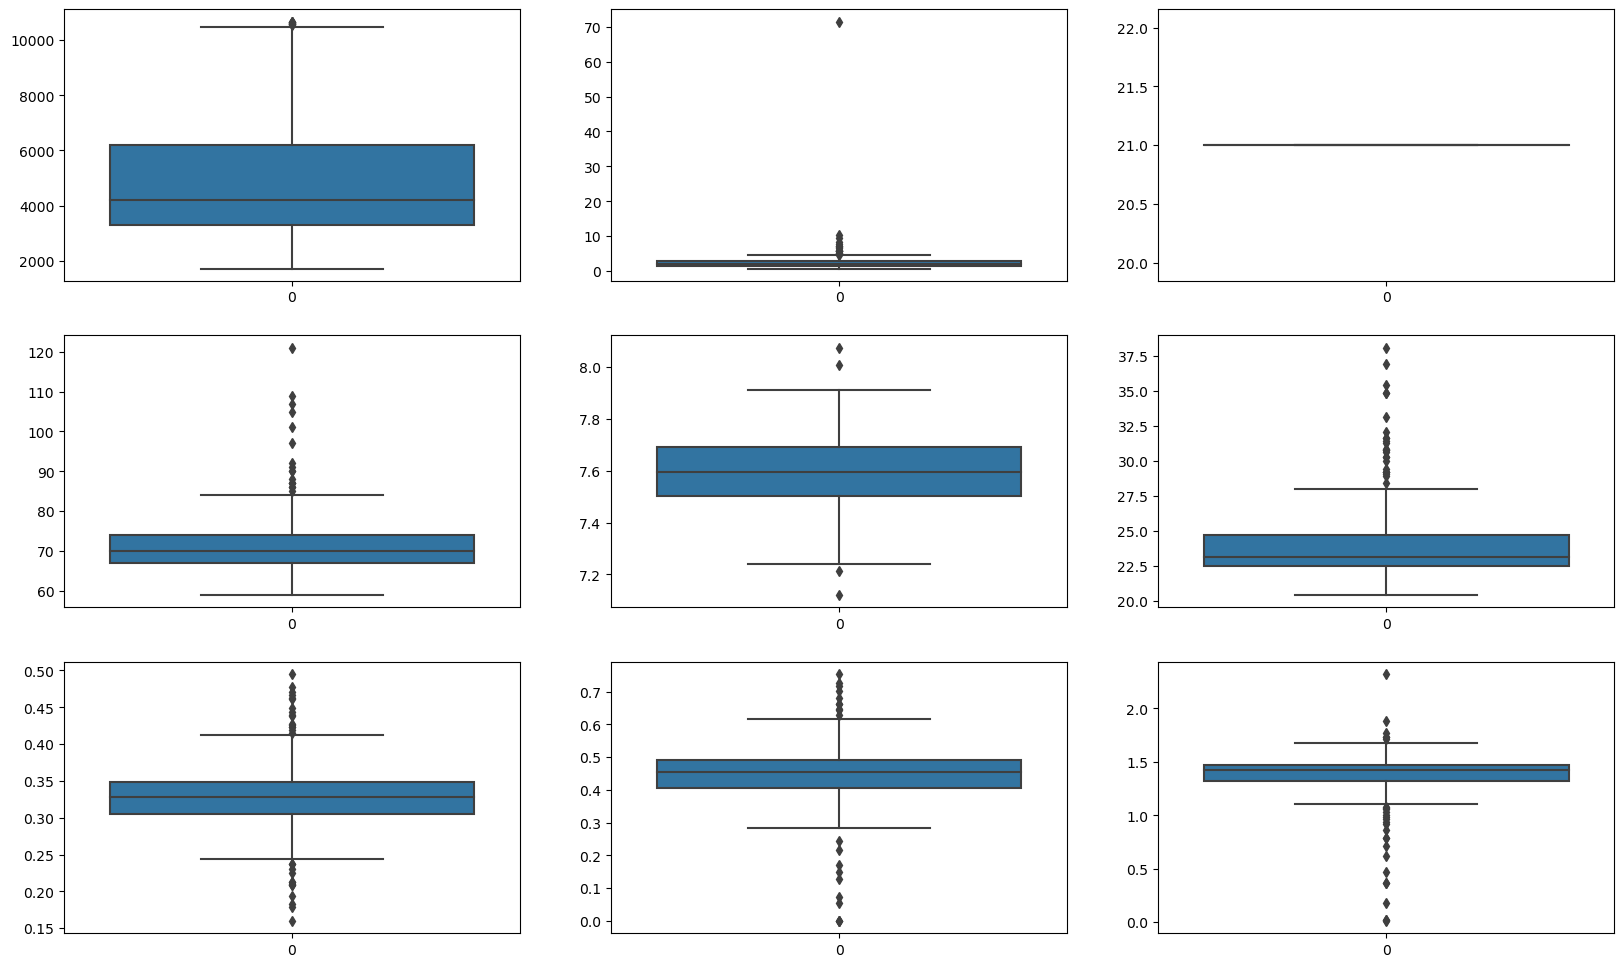

In [101]:
figura = plt.subplots(figsize = (20, 12))
i = 1

for coluna in colunas:
    eixos = plt.subplot(3, 3, i)
    sns.boxplot(df_lotes_filtrados_processed[coluna], ax = eixos)
    i += 1

plt.show()

##### Quantidade de linhas do dataframe

In [102]:
df_lotes_filtrados_processed.shape[0]

188

##### Quantidade de outliers por coluna

In [103]:
limites_inferiores = []
limites_superiores = []
interquartis = []

In [104]:
for coluna in colunas:
    quartil1 = np.percentile(df_lotes_filtrados_processed[coluna], 25, method = "midpoint")
    quartil3 = np.percentile(df_lotes_filtrados_processed[coluna], 75, method = "midpoint")
    interquartil = quartil3 - quartil1
    limite_superior = quartil3 + (1.5 * interquartil)
    limite_inferior = quartil1 - (1.5 * interquartil)
    limites_inferiores.append(limite_inferior)
    limites_superiores.append(limite_superior)
    interquartis.append(interquartil)
    print(coluna)
    print("1ro quartil: ", quartil1, "\n3ro quartil: ", quartil3, "\nIQR: ", interquartil)
    print("limite inferior: ", limite_inferior, "\nLimite Superior: ", limite_superior)
    print("Valor mínimo: ", df_lotes_filtrados_processed[coluna].min())
    print("Valor máximo: ", df_lotes_filtrados_processed[coluna].max())
    print("Desvio padrão: ", df_lotes_filtrados_processed[coluna].std(), "\n\n")

qtd_animal_inicial
1ro quartil:  3294.0 
3ro quartil:  6206.0 
IQR:  2912.0
limite inferior:  -1074.0 
Limite Superior:  10574.0
Valor mínimo:  1708
Valor máximo:  10673
Desvio padrão:  2121.7376068437197 


mortalidade
1ro quartil:  1.4969500077060975 
3ro quartil:  2.783311199645861 
IQR:  1.2863611919397635
limite inferior:  -0.4325917802035477 
Limite Superior:  4.7128529875555065
Valor mínimo:  0.7173601147776184
Valor máximo:  71.43340666779488
Desvio padrão:  5.276176102452431 


idade_inicial
1ro quartil:  21.0 
3ro quartil:  21.0 
IQR:  0.0
limite inferior:  21.0 
Limite Superior:  21.0
Valor mínimo:  21.0
Valor máximo:  21.0
Desvio padrão:  0.0 


idade_final
1ro quartil:  67.0 
3ro quartil:  74.0 
IQR:  7.0
limite inferior:  56.5 
Limite Superior:  84.5
Valor mínimo:  59.0
Valor máximo:  121.0
Desvio padrão:  9.065850233688261 


peso_inicial
1ro quartil:  7.50076416166673 
3ro quartil:  7.69058781444755 
IQR:  0.18982365278082014
limite inferior:  7.2160286824955 
Limite Su

In [137]:
print("Quantidade total de linhas", df_lotes_filtrados_processed.shape[0])

for i, coluna in enumerate(colunas):
    linhas_a_apagar = 0
    linhas_a_apagar += df_lotes_filtrados_processed[(df_lotes_filtrados_processed[coluna] > limites_superiores[i])].shape[0]
    linhas_a_apagar += df_lotes_filtrados_processed[(df_lotes_filtrados_processed[coluna] < limites_inferiores[i])].shape[0]
    print("Quantidade de linhas para apagar da coluna", coluna, ":", linhas_a_apagar)

Quantidade total de linhas 188
Quantidade de linhas para apagar da coluna qtd_animal_inicial : 7
Quantidade de linhas para apagar da coluna mortalidade : 16
Quantidade de linhas para apagar da coluna idade_inicial : 0
Quantidade de linhas para apagar da coluna idade_final : 17
Quantidade de linhas para apagar da coluna peso_inicial : 4
Quantidade de linhas para apagar da coluna peso_final : 25
Quantidade de linhas para apagar da coluna ganho_peso_diario : 28
Quantidade de linhas para apagar da coluna alimento_diario_animal : 20
Quantidade de linhas para apagar da coluna proporcao_alimento_ajustada : 27


A quantidade de linhas que serão apagadas: 7, 16, 17, 4, 25, 28, 20, 27 respectivamente das colunas *qtd_animal_inicial*, *mortalidade*, *idade_final*, *peso_inicial*, *peso_final*, *ganho_peso_diario*, *alimento_diario_animal*, *proporcao_alimento_ajustada* é um número muito alto. Isso iria gerar um desbalanço nos dados, ou até uma diminuição drástica, desde nós não sabemos se há linhas que se coincidem ou se não há nenhum coincidência.

**Foi decidido:**
- eliminar os valores máximos das colunas: *mortalidade*, *peso_final*, *idade_final*;
- e eliminar os valore mínimos das colunas: *ganho_peso_diario*, *alimento_diario_animal*, *proporcao_alimento_ajustada*.

In [140]:
# mortalidade
df_lotes_filtrados_processed = df_lotes_filtrados_processed[~(df_lotes_filtrados_processed["mortalidade"] == df_lotes_filtrados_processed["mortalidade"].max())]

# peso_final
df_lotes_filtrados_processed = df_lotes_filtrados_processed[~(df_lotes_filtrados_processed["peso_final"] == df_lotes_filtrados_processed["peso_final"].max())]

# idade_final
df_lotes_filtrados_processed = df_lotes_filtrados_processed[~(df_lotes_filtrados_processed["idade_final"] == df_lotes_filtrados_processed["idade_final"].max())]

# ganho_peso_diario
df_lotes_filtrados_processed = df_lotes_filtrados_processed[~(df_lotes_filtrados_processed["ganho_peso_diario"] == df_lotes_filtrados_processed["ganho_peso_diario"].min())]

# alimento_diario_animal
df_lotes_filtrados_processed = df_lotes_filtrados_processed[~(df_lotes_filtrados_processed["alimento_diario_animal"] == df_lotes_filtrados_processed["alimento_diario_animal"].min())]

# proporcao_alimento_ajustada
df_lotes_filtrados_processed = df_lotes_filtrados_processed[~(df_lotes_filtrados_processed["proporcao_alimento_ajustada"] == df_lotes_filtrados_processed["proporcao_alimento_ajustada"].min())]

In [142]:
print("Quantidade atual de linhas:", df_lotes_filtrados_processed.shape[0])

Quantidade atual de linhas: 182


Como podemos ver, 6 linhas foram perdidas no processo.

Essa perda poderia ser muito maior e mais expressiva, caso tivessemos excluido todos os outliers de uma vez.

### Verificando o comportamento do dataset com o scatterplot

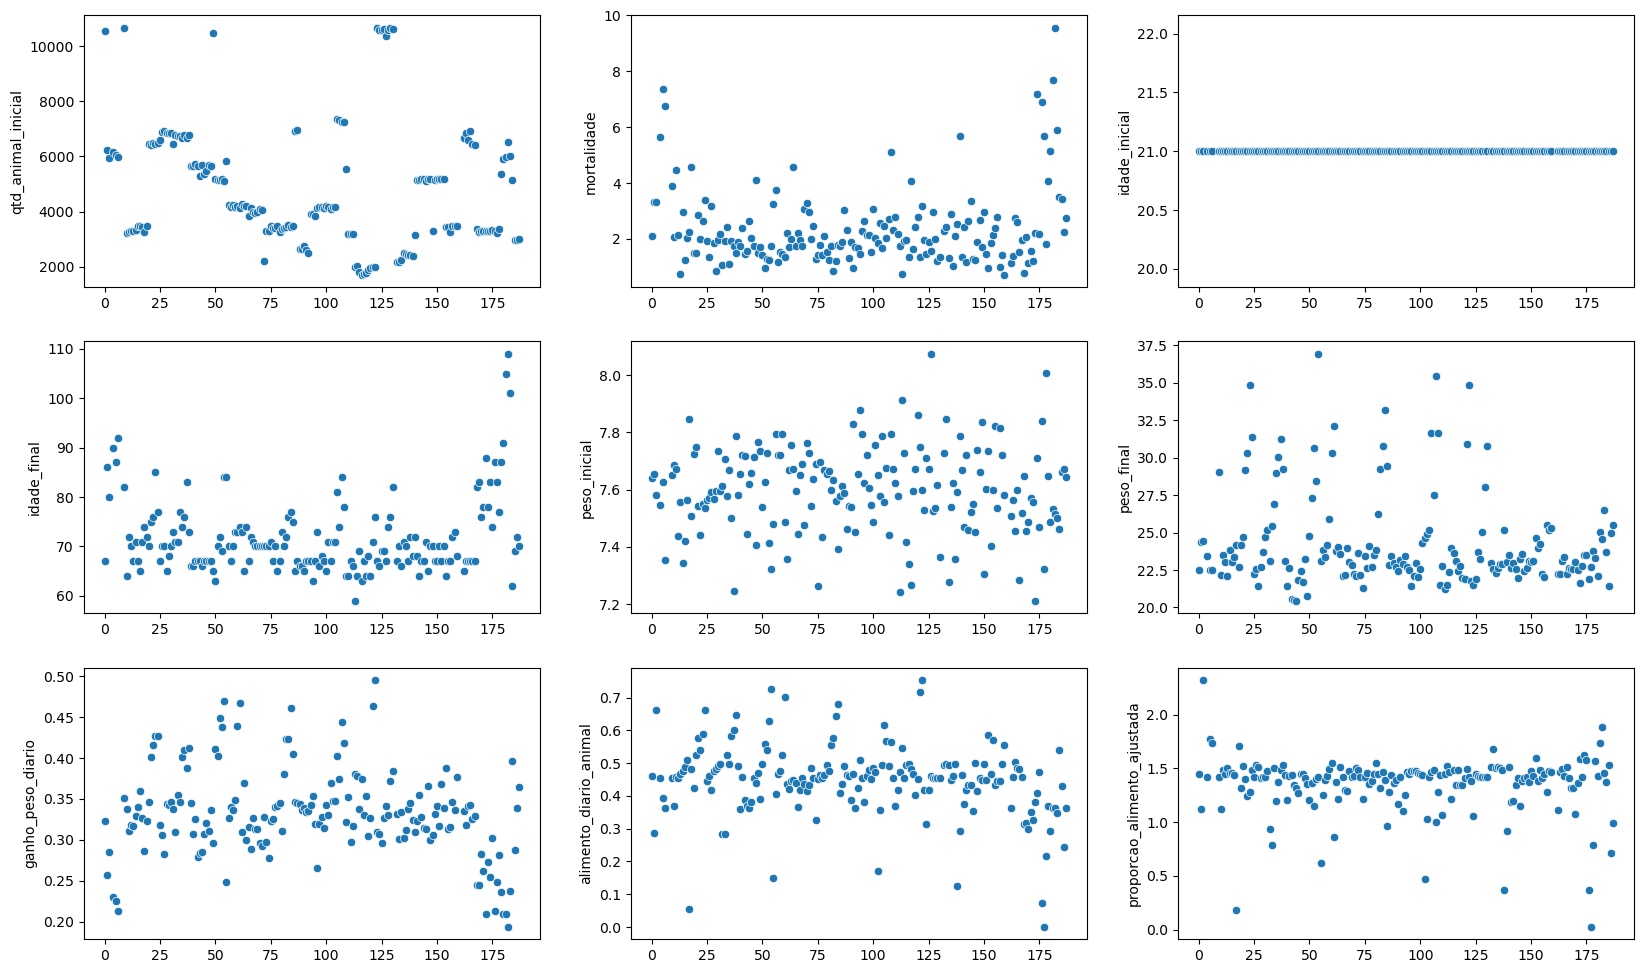

In [146]:
figura = plt.figure(figsize = (20, 12))
i = 1

for coluna in colunas:
    eixos = plt.subplot(3, 3, i)
    sns.scatterplot(data = df_lotes_filtrados_processed[coluna], ax = eixos)
    i += 1
    
plt.show()

Não é possível identificar nenhuma divisão clara de classes utilizando somente o scatterplot.

Mas é possível notar que os dados não estão espalhados de maneira uniforme, eles estão concentrados em certos pontos de cada gráfico.

Sendo *idade_inicial* linear e constante.

*qtd_animal_inicial* difusa, com várias aglomerações pelo gráfico, algumas das aglomerações, quando juntas, formam uma certa continuidade. 

*peso_inicial* a primeira vista é uniformemente espalhados, mas podemos notar que, em certos pontos, há pequenas aglomerações.

### Verificando o comportamento do dataset com histograma, distribuição normal e gráfico de linhas

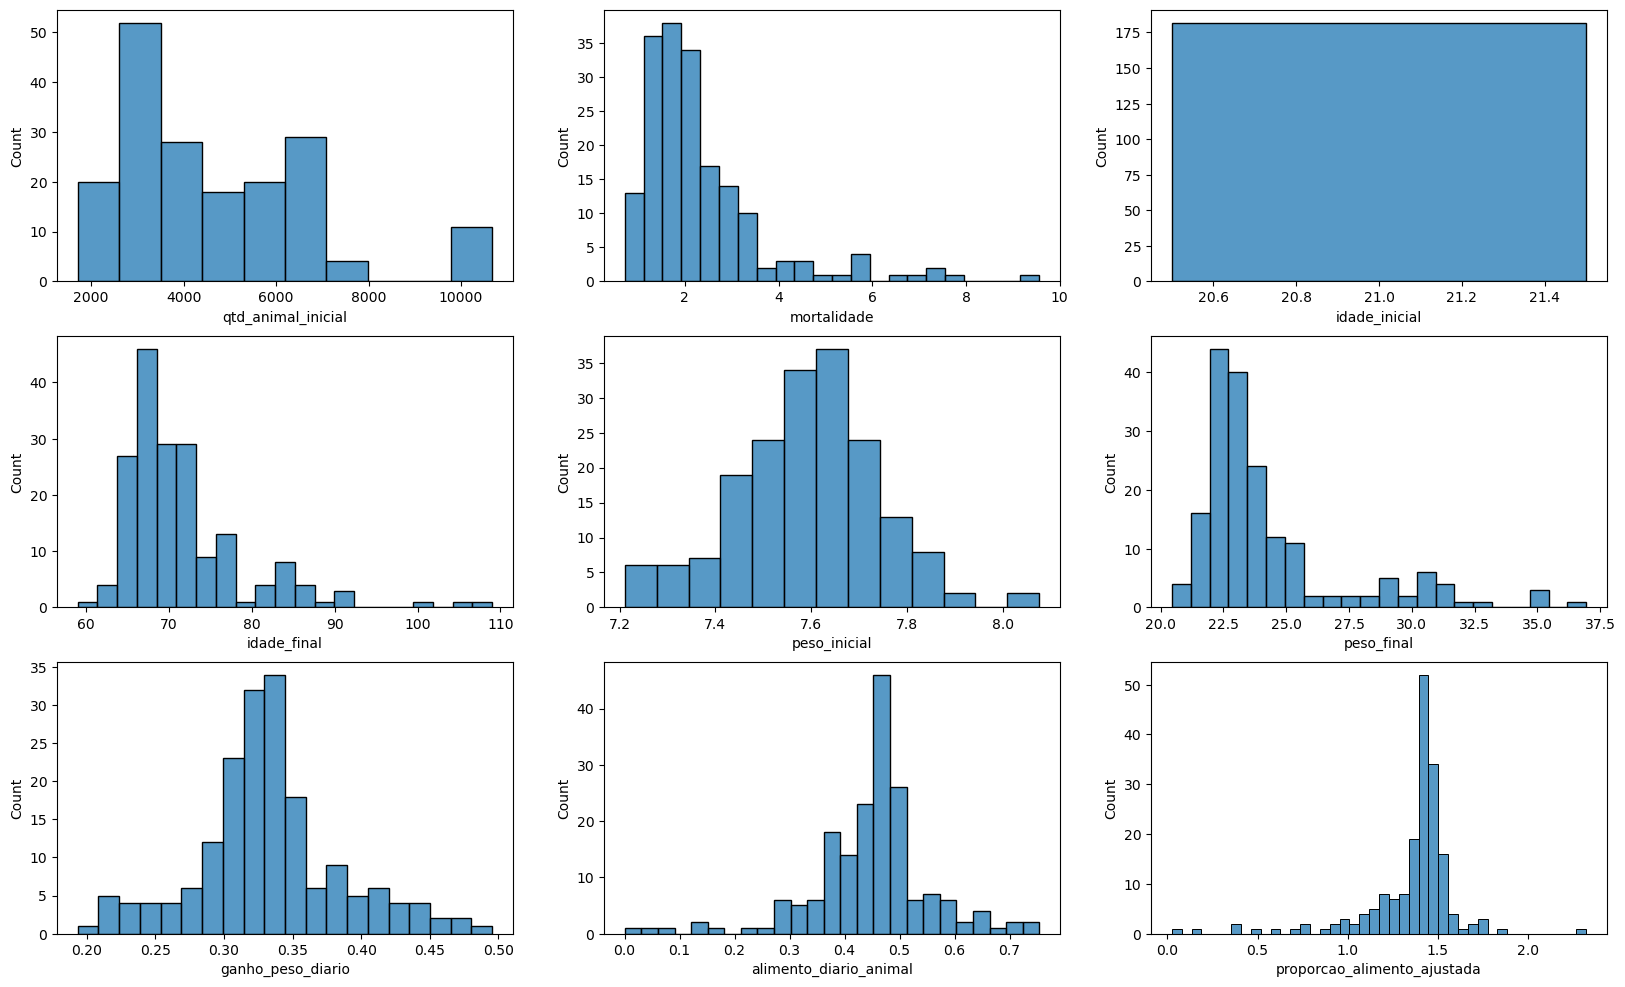

In [147]:
figura = plt.figure(figsize = (20, 12))
i = 1

for coluna in colunas:
    eixos = plt.subplot(3, 3, i)
    sns.histplot(data = df_lotes_filtrados_processed[coluna], ax = eixos)
    i += 1
    
plt.show()

/tmp/ipykernel_37105/2574138922.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_lotes_filtrados_processed[coluna], ax = eixos)
/tmp/ipykernel_37105/2574138922.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_lotes_filtrados_processed[coluna], ax = eixos)
/tmp/ipykernel_37105/2574138

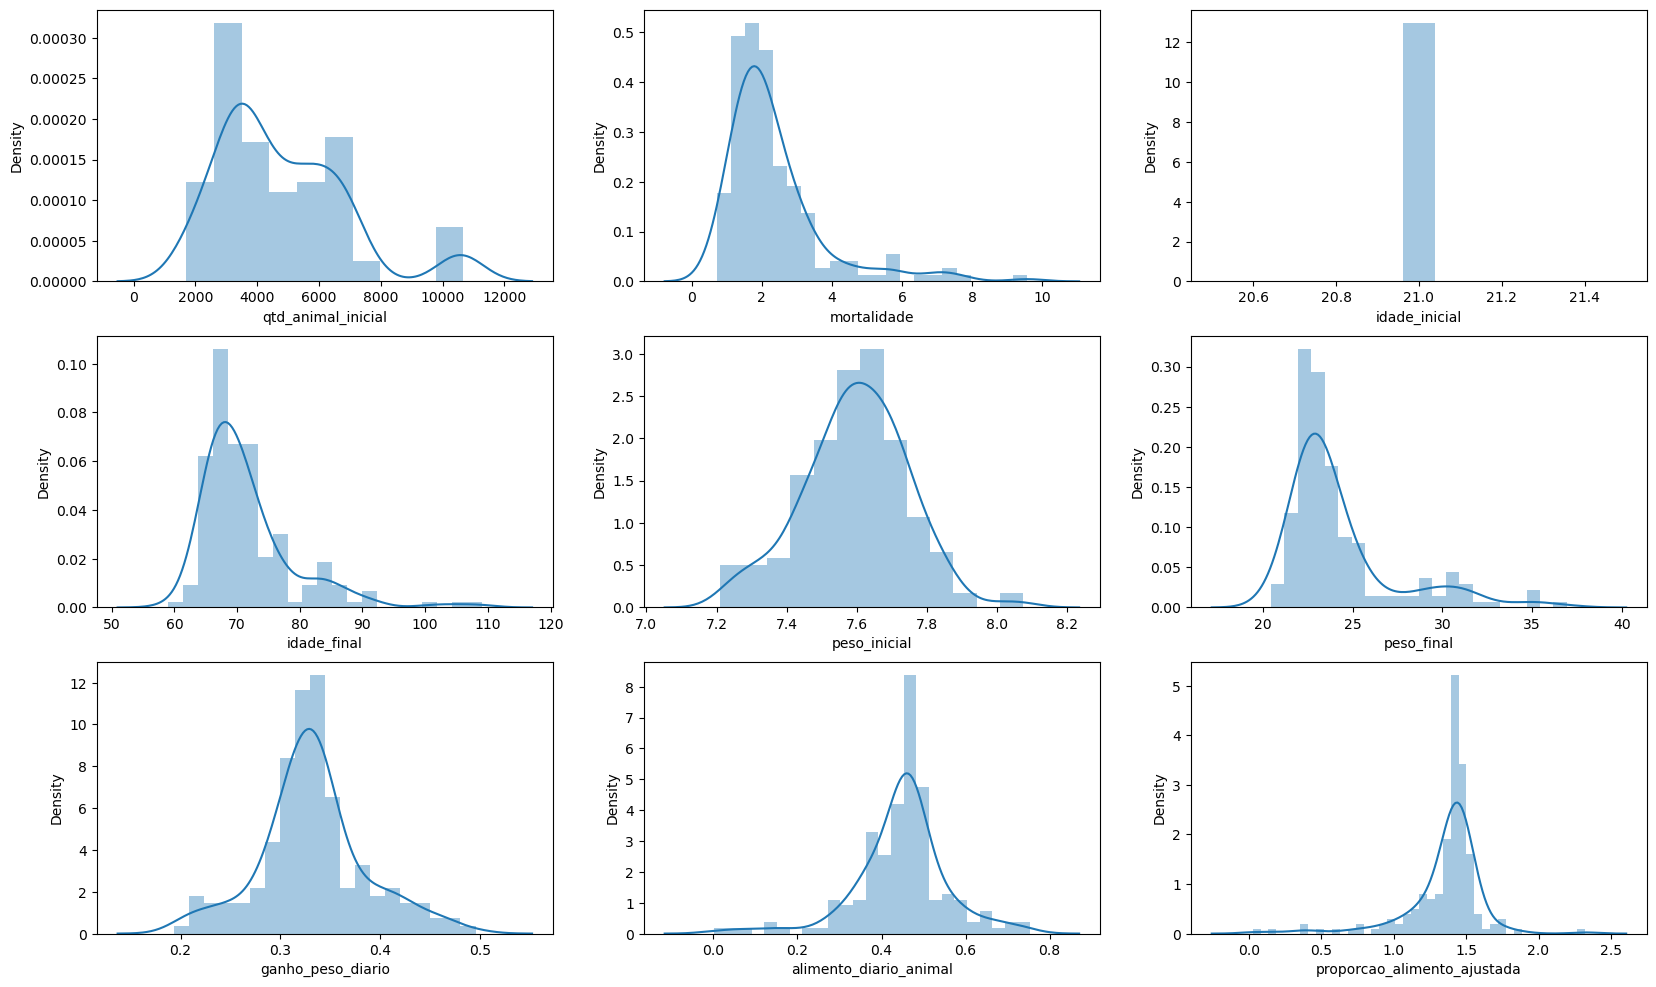

In [152]:
figura = plt.figure(figsize = (20, 12))
i = 1

for coluna in colunas:
    eixos = plt.subplot(3, 3, i)
    sns.distplot(df_lotes_filtrados_processed[coluna], ax = eixos)
    i += 1
    
plt.show()

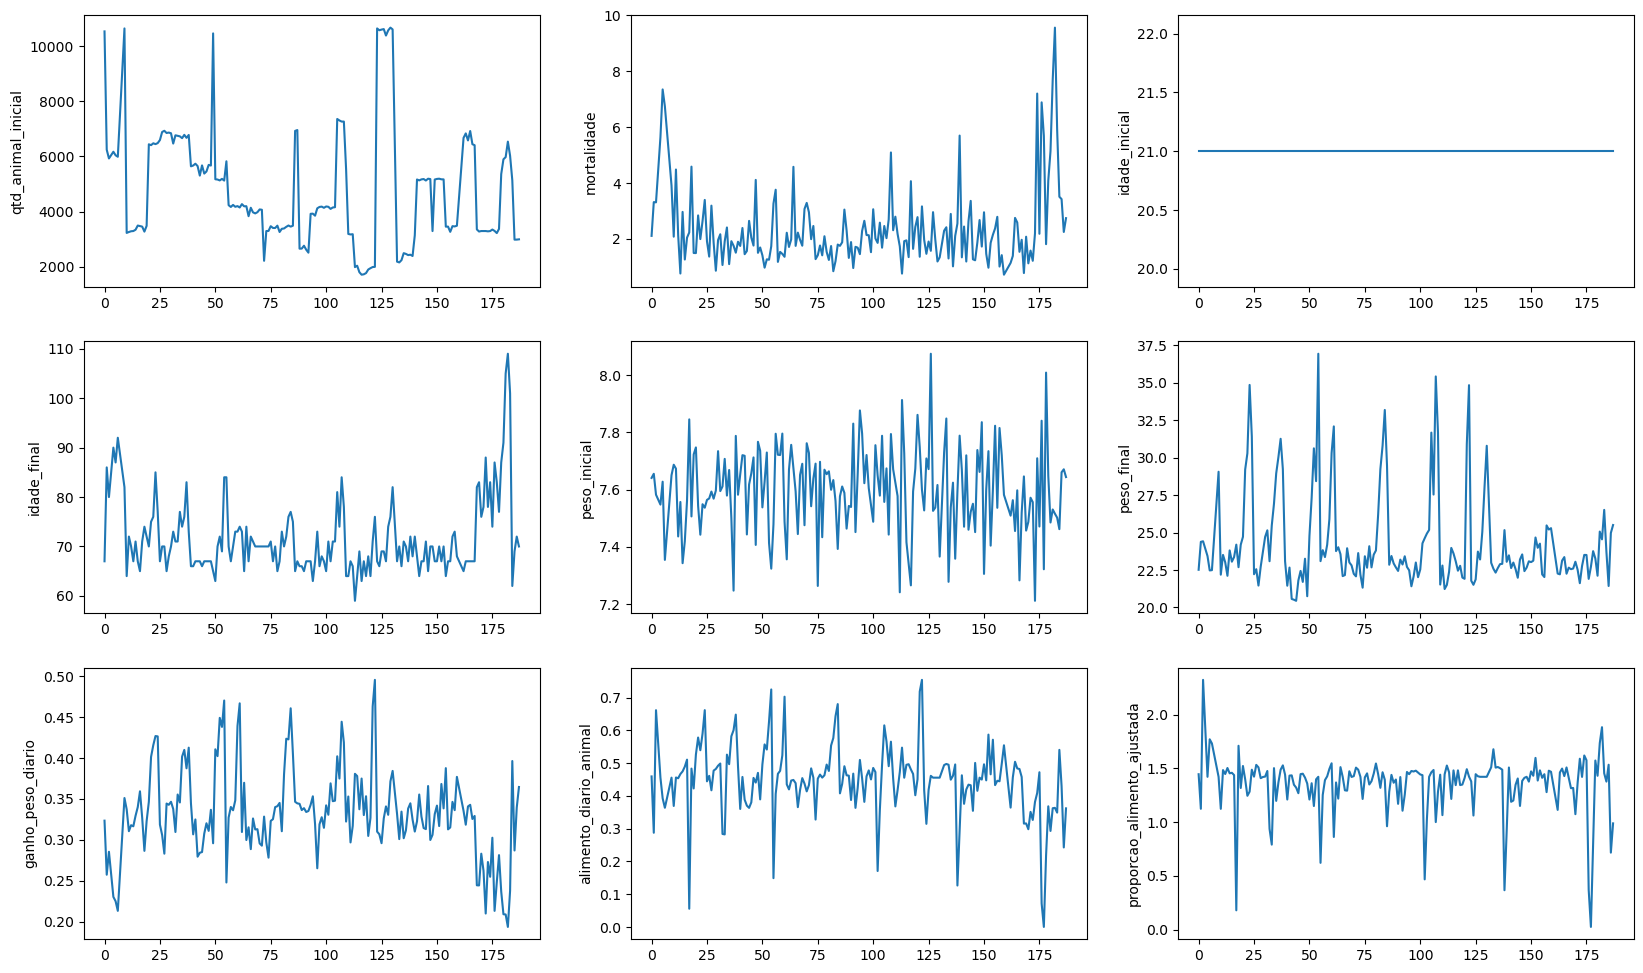

In [153]:
figura = plt.figure(figsize = (20, 12))
i = 1

for coluna in colunas:
    eixos = plt.subplot(3, 3, i)
    sns.lineplot(df_lotes_filtrados_processed[coluna], ax = eixos)
    i += 1
    
plt.show()

Podemos notar, com os três gráficos anteriores, que as colunas de fato não são contínuas, nem se comportam de forma contínua (como uma função afim, quadrática etc), seus valores estão aglomerados sobre um certo pontos e sua distribuição normal varia muito, com colunas com dois picos de distribuição e colunas com alta amplitude, mas baixa frequência.

### Salvando o dataset atual em um arquivo .pkl

In [164]:
df_lotes_filtrados_processed.to_pickle("./datasets/processed/lotes-filtrados.pkl")

### Testando os parâmetros do Kmeans

##### Lista auxiliar para a escolha dos melhores parâmetros

In [154]:
qtd_de_rodadas = [i for i in range(10, 130, 10)]
qtd_de_rodadas.append("auto")
print("Conteúdo da lista: ", qtd_de_rodadas)
print("Seu tipo é: ", type(qtd_de_rodadas))

Conteúdo da lista:  [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 'auto']
Seu tipo é:  <class 'list'>


##### Atribuindo a quantidade de clusters que serão utilizados

In [155]:
nro_de_cluster = [i for i in range(2, 13)]
print("Conteúdo da lista: ", nro_de_cluster)
print("Seu tipo é: ", type(nro_de_cluster))

Conteúdo da lista:  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Seu tipo é:  <class 'list'>


##### Quantidade máxima de iterações

In [156]:
maximo_de_iteracoes = 1200

##### Realizando os testes

In [158]:
for nro_cluster in nro_de_cluster:
    for rodada in qtd_de_rodadas:
        kmeans = KMeans(
                        n_clusters = nro_cluster,
                        n_init = rodada,
                        random_state = 50, # deixando a SEED manual para futuras observacoes
                        max_iter = maximo_de_iteracoes
                    )
        kmeans.fit(df_lotes_filtrados_processed)
        
        # usando o silhouette para pegar os score de forma limpa
        score_atual = silhouette_score(df_lotes_filtrados_processed, kmeans.labels_)
        
        # salvando os melhores parametros
        if score_atual > melhores_parametros["Score"]:
            melhores_parametros = atualiza_dicionario(melhores_parametros, nro_cluster, rodada, score_atual)
    
melhores_parametros

{'numero_de_clusters': 6,
 'quantidade_de_rodadas': 10,
 'Score': 0.6500475815834467}

Temos então que os melhores parâmetros, para o máximo de 1200 iterações, são:
- 6 Clusters;
- 10 Rodadas;
- 0.6500475815834467 de Score.

##### Realizando a divisão final dos clusters utilizando os melhores parâmetros

In [159]:
kmeans = KMeans(
            n_clusters = melhores_parametros["numero_de_clusters"],
            n_init = melhores_parametros["quantidade_de_rodadas"],
            max_iter = maximo_de_iteracoes,
            random_state = 50 # deixando a SEED manual para futuras observacoes
        )
kmeans.fit(df_lotes_filtrados_processed)

KMeans(max_iter=1200, n_clusters=6, n_init=10, random_state=50)

##### Resultado da previsão

In [160]:
y_predicao = kmeans.predict(df_lotes_filtrados_processed)
print(len(y_predicao))
print(y_predicao)

182
[0 3 3 0 0 0 2 5 5 3 3 3 3 3 0 0 0 0 4 4 4 2 3 3 3 3 3 0 0 0 0 4 4 4 2 2 1
 1 1 5 5 5 5 5 3 3 3 0 0 4 4 2 0 0 0 0 4 4 4 1 1 1 5 5 5 5 5 3 3 3 3 3 3 3
 3 0 0 0 0 4 4 4 4 1 1 1 1 1 5 5 5 5 3 3 3 3 3 3 0 0 0 0 4 4 2 2 5 5 5 5 1
 1 1 5 5 5 5 5 2 2 3 3 3 0 0 0 4 4 5 3 3 3 3 3 0 0 0 1 1 1 5 5 5 5 3 3 3 3
 3 3 0 0 0 0 4 4 5 5 5 5 5 5 1 1 5 5 5 3 3 3 3 0 0 0 0 4 4 2 0 0 0 0]


#### Visualizando as classes e suas ocorrências

In [161]:
classes, quantidade = np.unique(y_predicao, return_counts = True)

for i in range(0, len(classes)):
    print(f"Para a classe {classes[i]}, existem {quantidade[i]} ocorrências.")

Para a classe 0, existem 44 ocorrências.
Para a classe 1, existem 19 ocorrências.
Para a classe 2, existem 10 ocorrências.
Para a classe 3, existem 47 ocorrências.
Para a classe 4, existem 23 ocorrências.
Para a classe 5, existem 39 ocorrências.


##### Os centróides

In [162]:
centroides = kmeans.cluster_centers_
centroides

array([[6.19565045e+05, 4.91270455e+03, 2.69701824e+00, 2.10000000e+01,
        7.25000000e+01, 7.65324140e+00, 2.39123713e+01, 3.21809417e-01,
        3.94446983e-01, 1.23336199e+00, 5.41818182e+01],
       [3.39657632e+05, 4.18636842e+03, 2.02455546e+00, 2.10000000e+01,
        6.82105263e+01, 7.61105473e+00, 2.29587369e+01, 3.29250410e-01,
        4.32682393e-01, 1.33497099e+00, 4.82105263e+01],
       [8.59319700e+05, 6.02310000e+03, 3.05209742e+00, 2.10000000e+01,
        8.09000000e+01, 7.56318379e+00, 3.17291373e+01, 4.10676780e-01,
        5.96716268e-01, 1.39975603e+00, 6.09000000e+01],
       [5.15993489e+05, 4.74036170e+03, 2.29322038e+00, 2.10000000e+01,
        6.99574468e+01, 7.57909852e+00, 2.27335368e+01, 3.11856557e-01,
        4.44851119e-01, 1.43732843e+00, 5.01063830e+01],
       [7.42261783e+05, 5.72191304e+03, 2.28050091e+00, 2.10000000e+01,
        7.79130435e+01, 7.55605685e+00, 2.90679715e+01, 3.87038967e-01,
        5.35633288e-01, 1.38861178e+00, 5.83913043e+

#### Separando os clusters

##### Criando uma coluna extra para salvar as classes de cada lote

In [163]:
df_lotes_filtrados_processed["classe"] = kmeans.labels_
df_lotes_filtrados_processed.sample(10)

id_lote  qtd_animal_inicial  mortalidade  idade_inicial  idade_final  \
149   476539                5161     1.724472           21.0         67.0   
147   415853                5178     1.873310           21.0         70.0   
40    339545                5669     1.746340           21.0         66.0   
51    680260                5161     0.968804           21.0         70.0   
118   396675                1766     1.642129           21.0         64.0   
69    438737                3976     3.068410           21.0         70.0   
115   339085                1798     1.946607           21.0         69.0   
121   912928                1986     1.359517           21.0         71.0   
128   664685               10573     1.986191           21.0         74.0   
145   393790                5125     1.268293           21.0         71.0   

     peso_inicial  peso_final  ganho_peso_diario  alimento_diario_animal  \
149      7.835790   23.081526           0.331429                0.449870   
147      7.738355   22.426936           0.299767                0.415554   
40       7.653371   21.452855           0.306655                0.360211   
51       7.627690   27.336607           0.402223                0.557022   
118      7.593488   22.781923           0.353219                0.466991   
69       7.475392   22.812013           0.312992                0.437605   
115      7.416018   23.607033           0.337313                0.494848   
121      7.748308   30.896580           0.462965                0.718121   
128      7.537007   25.056767           0.330562                0.455628   
145      7.550521   23.204071           0.313071                0.354466   

     proporcao_alimento_ajustada  dias_no_galpao  classe  
149                     1.376548              47       3  
147                     1.411987              50       5  
40                      1.210118              46       1  
51                      1.361493              50       0  
118                     1.344279              44       5  
69                      1.420014              50       5  
115                     1.480959              49       1  
121                     1.492168              51       2  
128                     1.421298              54       0  
145                     1.150183              51       5

* dados_classe_1: os dados filtrados que pertencem a classe 0 predita no kmeans

* dados_classe_2: os dados filtrados que pertencem a classe 1 predita no kmeans

* dados_classe_3: os dados filtrados que pertencem a classe 2 predita no kmeans

* dados_classe_4: os dados filtrados que pertencem a classe 3 predita no kmeans

* dados_classe_5: os dados filtrados que pertencem a classe 4 predita no kmeans

* dados_classe_6: os dados filtrados que pertencem a classe 5 predita no kmeans

In [166]:
dados_classe_1 = df_lotes_filtrados_processed[df_lotes_filtrados_processed.classe == 0].drop(columns = "classe")
dados_classe_2 = df_lotes_filtrados_processed[df_lotes_filtrados_processed.classe == 1].drop(columns = "classe")
dados_classe_3 = df_lotes_filtrados_processed[df_lotes_filtrados_processed.classe == 2].drop(columns = "classe")
dados_classe_4 = df_lotes_filtrados_processed[df_lotes_filtrados_processed.classe == 3].drop(columns = "classe")
dados_classe_5 = df_lotes_filtrados_processed[df_lotes_filtrados_processed.classe == 4].drop(columns = "classe")
dados_classe_6 = df_lotes_filtrados_processed[df_lotes_filtrados_processed.classe == 5].drop(columns = "classe")

##### Os nomes das coluna para futura consulta

In [165]:
df_lotes_filtrados_processed.columns

Index(['id_lote', 'qtd_animal_inicial', 'mortalidade', 'idade_inicial',
       'idade_final', 'peso_inicial', 'peso_final', 'ganho_peso_diario',
       'alimento_diario_animal', 'proporcao_alimento_ajustada',
       'dias_no_galpao', 'classe'],
      dtype='object')

#### Gráfico de dispersão (scatterplot)

/tmp/ipykernel_37105/3679524280.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  eixo = plt.subplot(3, 2, 1)


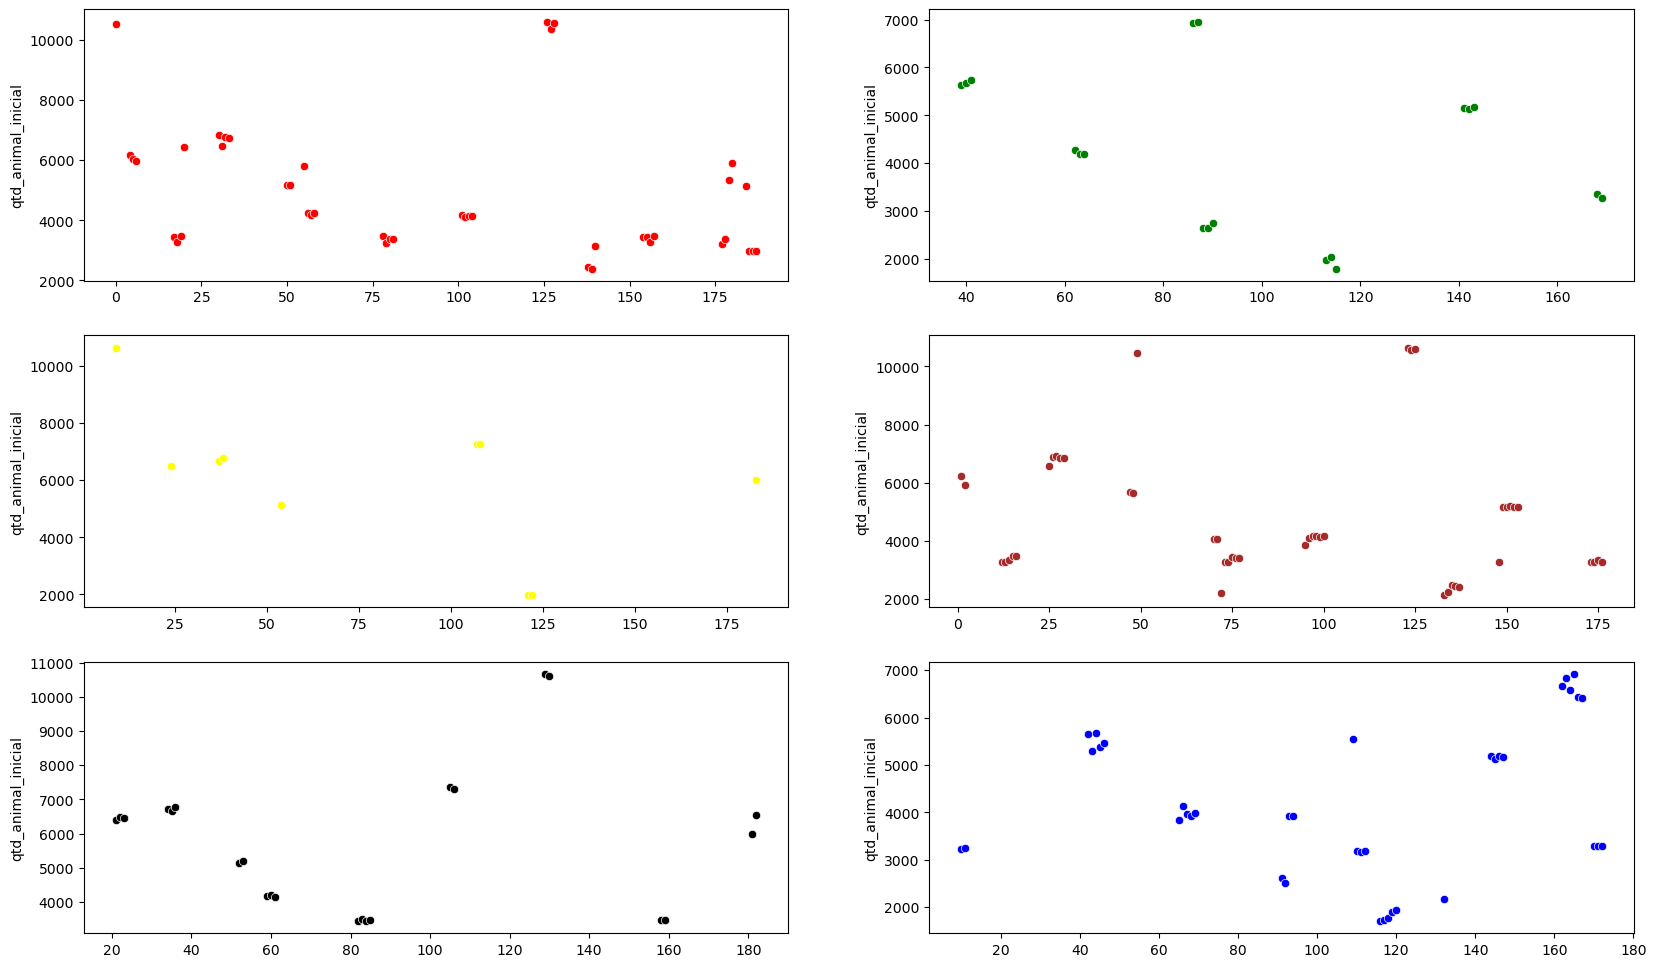

In [171]:
figura = plt.subplots(figsize = (20, 12))
coluna = "qtd_animal_inicial"

eixo = plt.subplot(3, 2, 1)
sns.scatterplot(dados_classe_1[coluna], ax = eixo, color = "red")

eixo = plt.subplot(3, 2, 2)
sns.scatterplot(dados_classe_2[coluna], ax = eixo, color = "green")

eixo = plt.subplot(3, 2, 3)
sns.scatterplot(dados_classe_3[coluna], ax = eixo, color = "yellow")

eixo = plt.subplot(3, 2, 4)
sns.scatterplot(dados_classe_4[coluna], ax = eixo, color = "brown")

eixo = plt.subplot(3, 2, 5)
sns.scatterplot(dados_classe_5[coluna], ax = eixo, color = "black")

eixo = plt.subplot(3, 2, 6)
sns.scatterplot(dados_classe_6[coluna], ax = eixo, color = "blue")

plt.show()

/tmp/ipykernel_37105/248638221.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  eixo = plt.subplot(3, 2, 1)


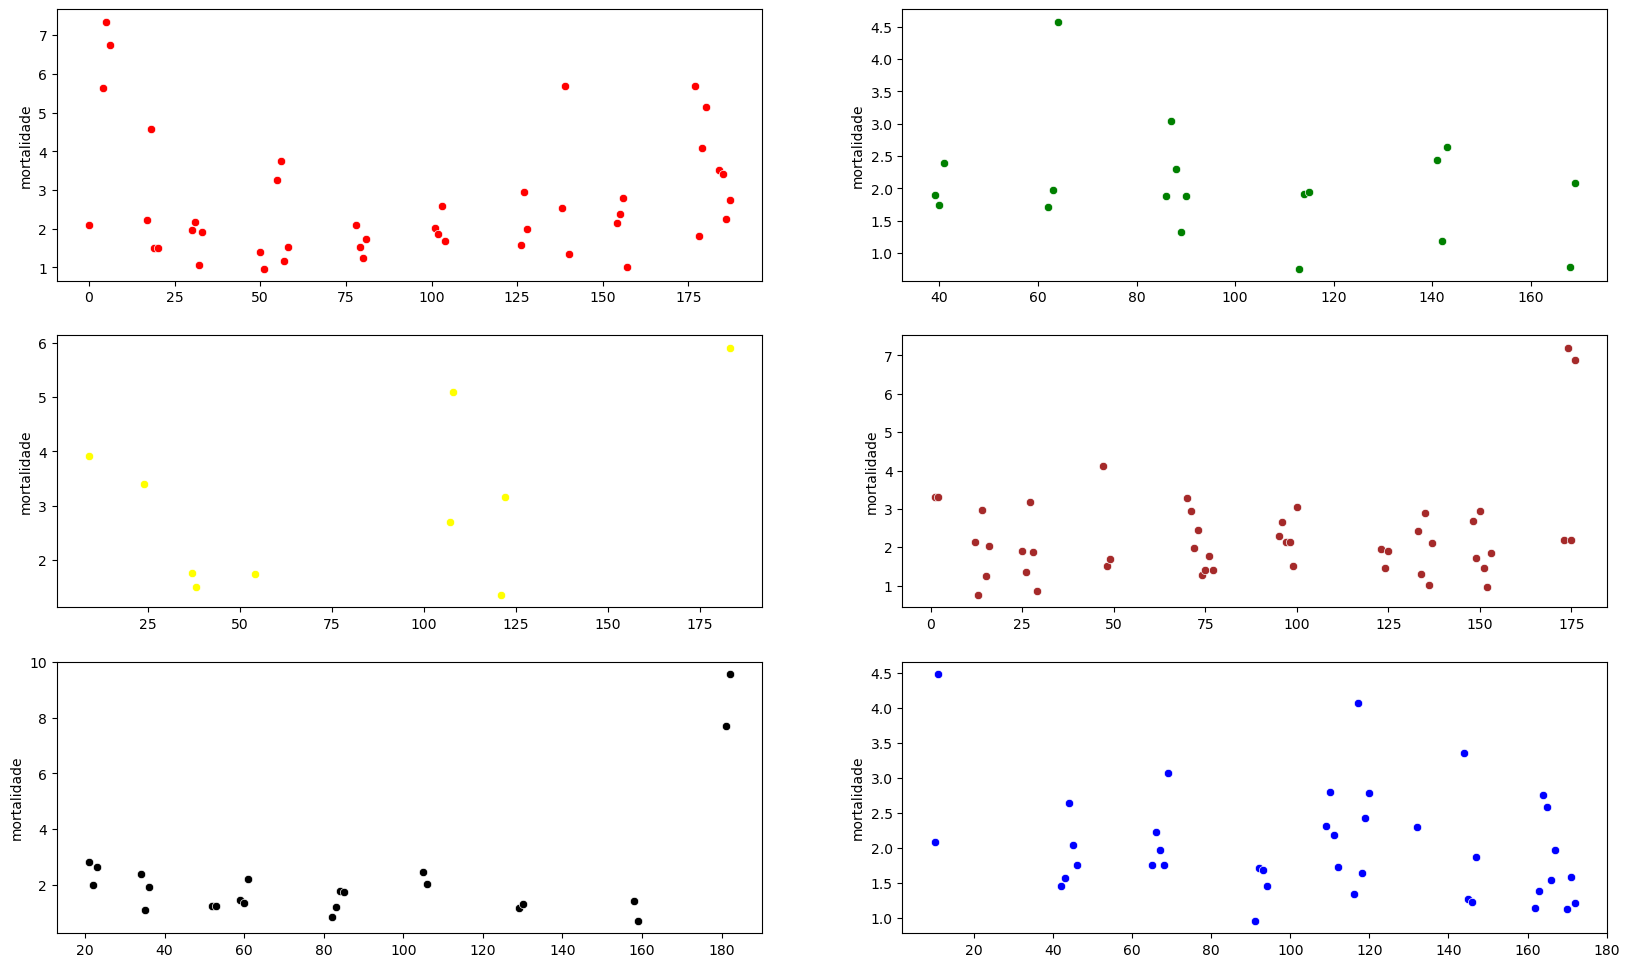

In [172]:
figura = plt.subplots(figsize = (20, 12))
coluna = "mortalidade"

eixo = plt.subplot(3, 2, 1)
sns.scatterplot(dados_classe_1[coluna], ax = eixo, color = "red")

eixo = plt.subplot(3, 2, 2)
sns.scatterplot(dados_classe_2[coluna], ax = eixo, color = "green")

eixo = plt.subplot(3, 2, 3)
sns.scatterplot(dados_classe_3[coluna], ax = eixo, color = "yellow")

eixo = plt.subplot(3, 2, 4)
sns.scatterplot(dados_classe_4[coluna], ax = eixo, color = "brown")

eixo = plt.subplot(3, 2, 5)
sns.scatterplot(dados_classe_5[coluna], ax = eixo, color = "black")

eixo = plt.subplot(3, 2, 6)
sns.scatterplot(dados_classe_6[coluna], ax = eixo, color = "blue")

plt.show()

/tmp/ipykernel_37105/123986402.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  eixo = plt.subplot(3, 2, 1)


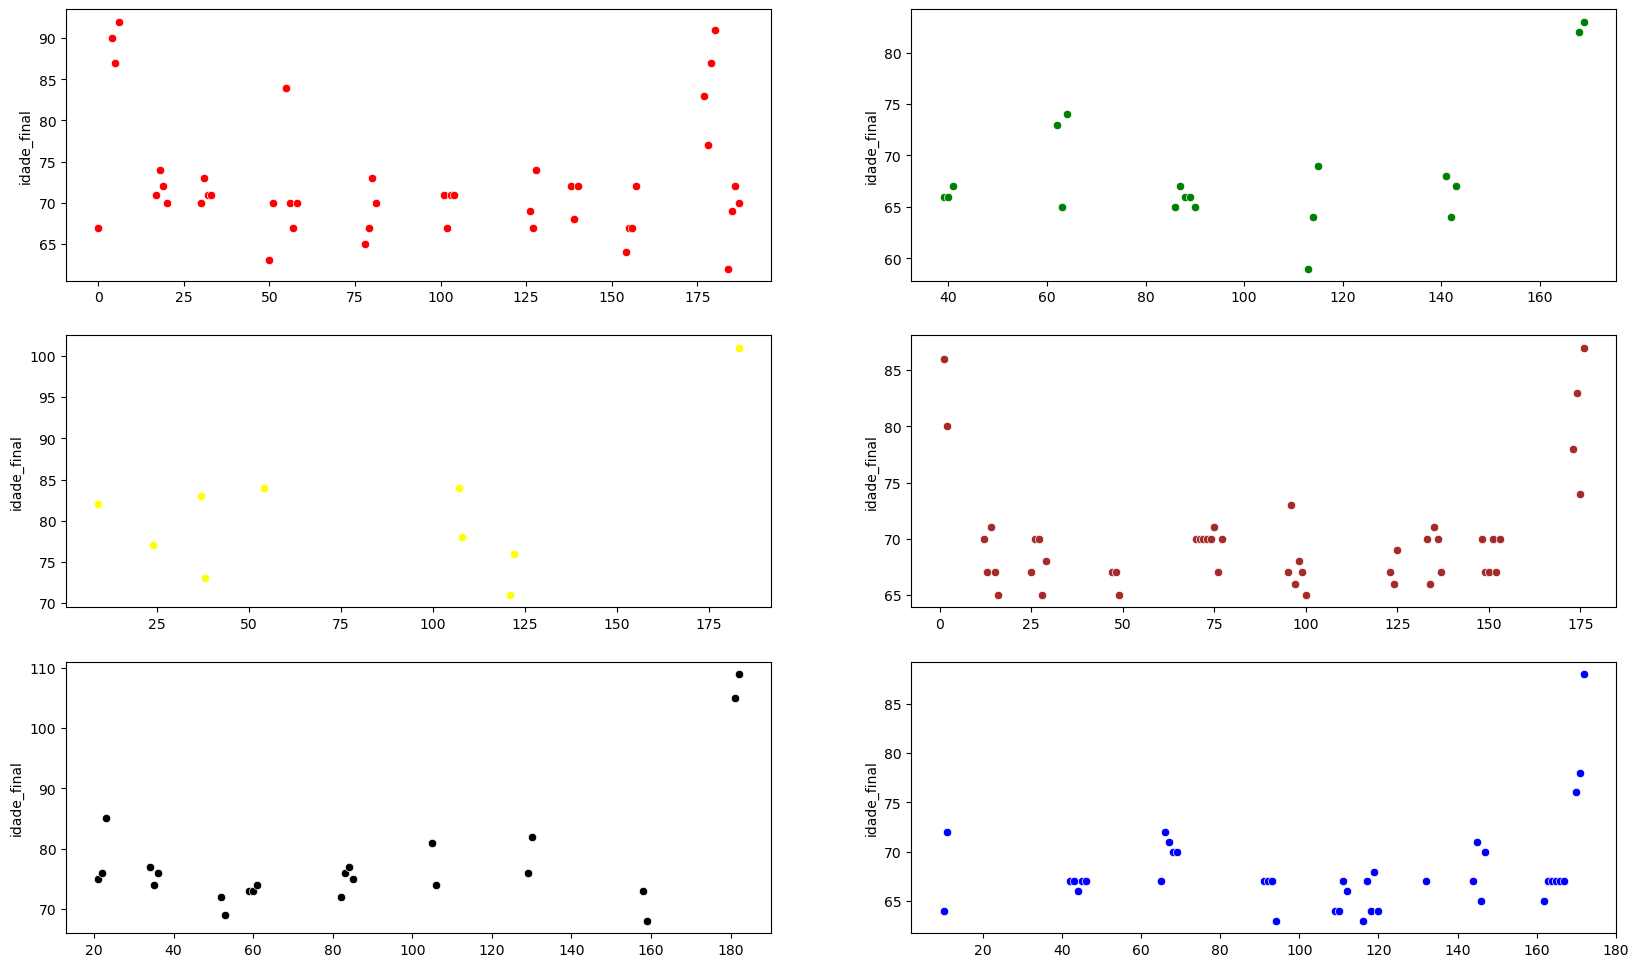

In [173]:
figura = plt.subplots(figsize = (20, 12))
coluna = "idade_final"

eixo = plt.subplot(3, 2, 1)
sns.scatterplot(dados_classe_1[coluna], ax = eixo, color = "red")

eixo = plt.subplot(3, 2, 2)
sns.scatterplot(dados_classe_2[coluna], ax = eixo, color = "green")

eixo = plt.subplot(3, 2, 3)
sns.scatterplot(dados_classe_3[coluna], ax = eixo, color = "yellow")

eixo = plt.subplot(3, 2, 4)
sns.scatterplot(dados_classe_4[coluna], ax = eixo, color = "brown")

eixo = plt.subplot(3, 2, 5)
sns.scatterplot(dados_classe_5[coluna], ax = eixo, color = "black")

eixo = plt.subplot(3, 2, 6)
sns.scatterplot(dados_classe_6[coluna], ax = eixo, color = "blue")

plt.show()

/tmp/ipykernel_37105/1339961128.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  eixo = plt.subplot(3, 2, 1)


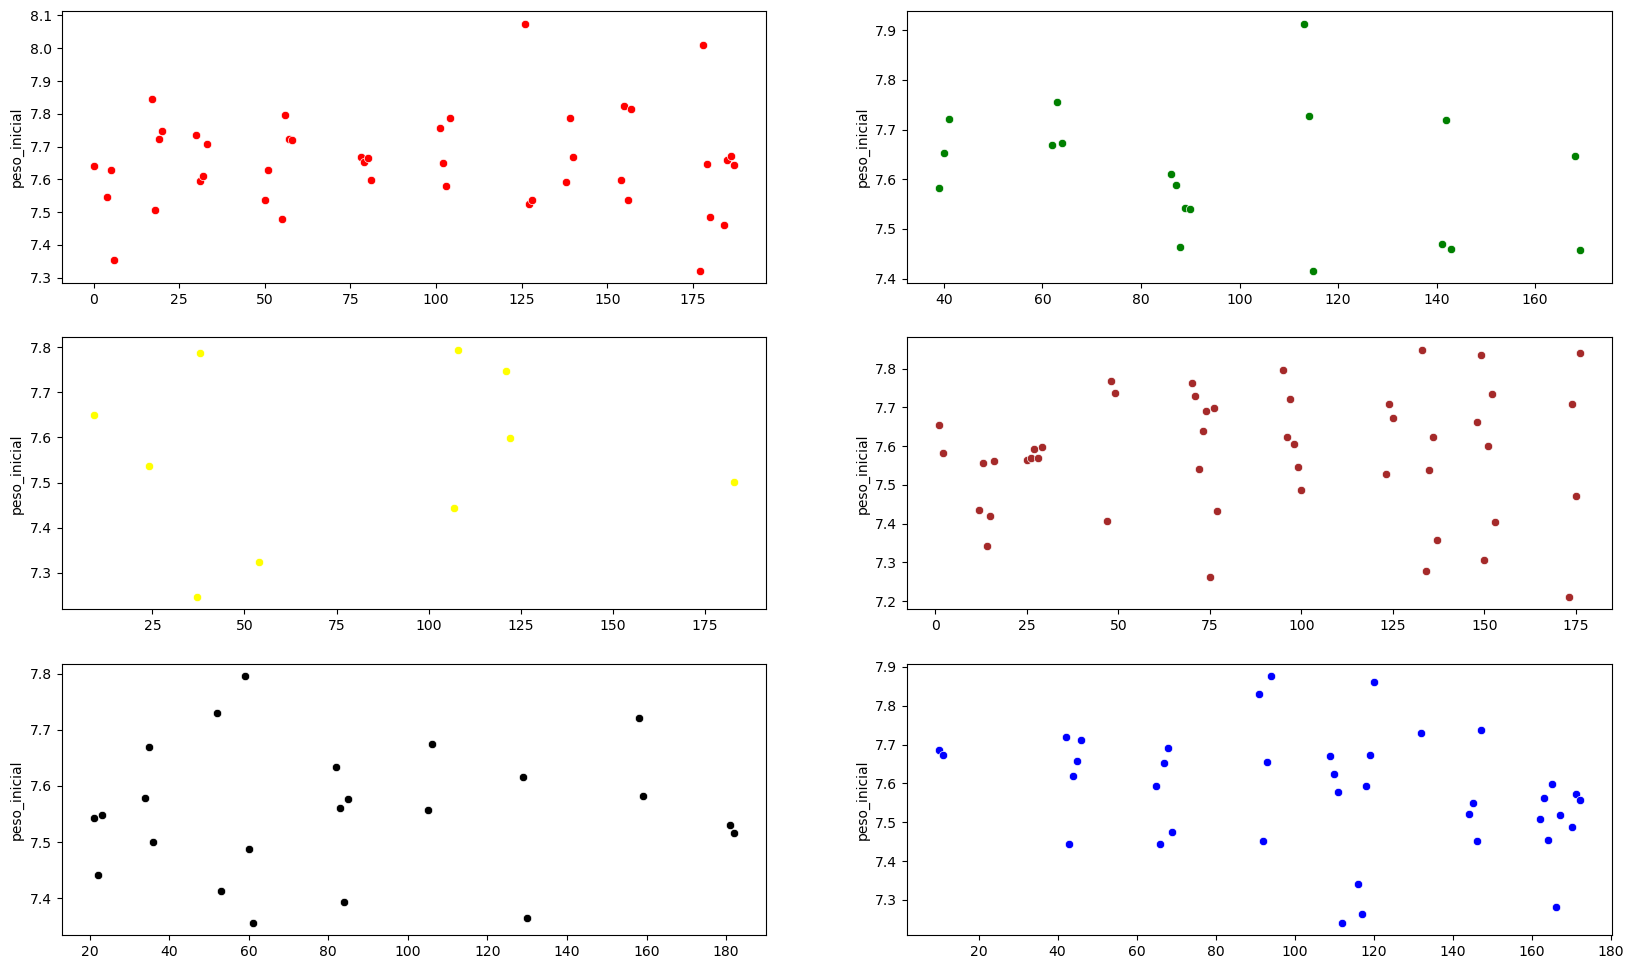

In [174]:
figura = plt.subplots(figsize = (20, 12))
coluna = "peso_inicial"

eixo = plt.subplot(3, 2, 1)
sns.scatterplot(dados_classe_1[coluna], ax = eixo, color = "red")

eixo = plt.subplot(3, 2, 2)
sns.scatterplot(dados_classe_2[coluna], ax = eixo, color = "green")

eixo = plt.subplot(3, 2, 3)
sns.scatterplot(dados_classe_3[coluna], ax = eixo, color = "yellow")

eixo = plt.subplot(3, 2, 4)
sns.scatterplot(dados_classe_4[coluna], ax = eixo, color = "brown")

eixo = plt.subplot(3, 2, 5)
sns.scatterplot(dados_classe_5[coluna], ax = eixo, color = "black")

eixo = plt.subplot(3, 2, 6)
sns.scatterplot(dados_classe_6[coluna], ax = eixo, color = "blue")

plt.show()

/tmp/ipykernel_37105/3964327598.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  eixo = plt.subplot(3, 2, 1)


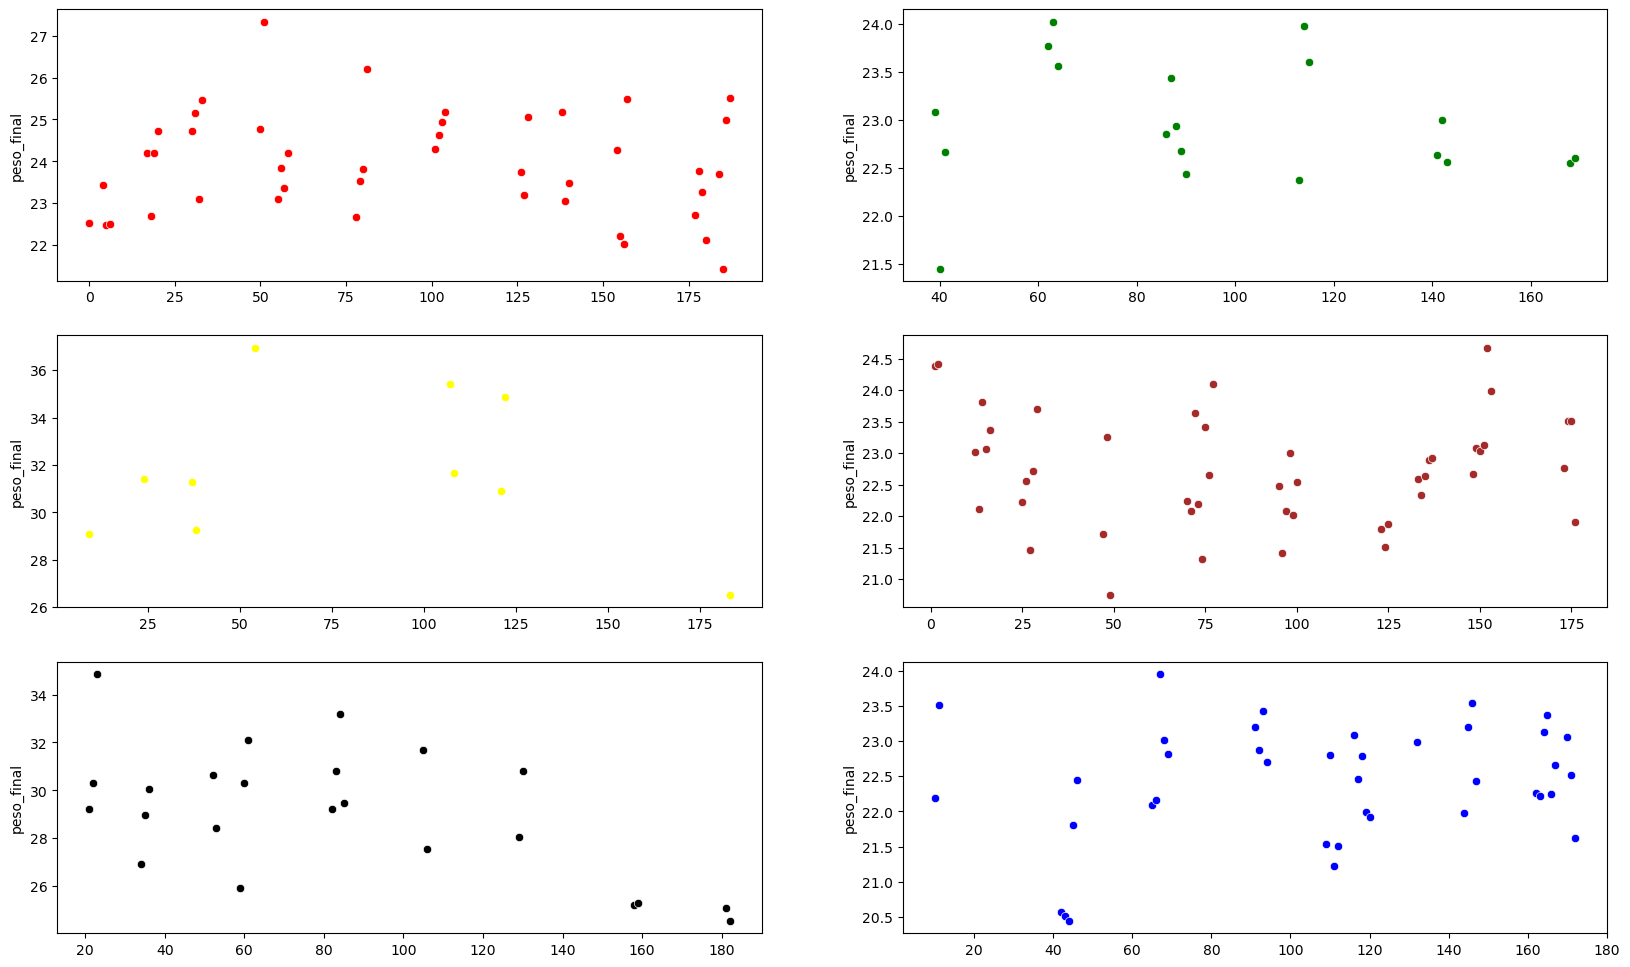

In [175]:
figura = plt.subplots(figsize = (20, 12))
coluna = "peso_final"

eixo = plt.subplot(3, 2, 1)
sns.scatterplot(dados_classe_1[coluna], ax = eixo, color = "red")

eixo = plt.subplot(3, 2, 2)
sns.scatterplot(dados_classe_2[coluna], ax = eixo, color = "green")

eixo = plt.subplot(3, 2, 3)
sns.scatterplot(dados_classe_3[coluna], ax = eixo, color = "yellow")

eixo = plt.subplot(3, 2, 4)
sns.scatterplot(dados_classe_4[coluna], ax = eixo, color = "brown")

eixo = plt.subplot(3, 2, 5)
sns.scatterplot(dados_classe_5[coluna], ax = eixo, color = "black")

eixo = plt.subplot(3, 2, 6)
sns.scatterplot(dados_classe_6[coluna], ax = eixo, color = "blue")

plt.show()

/tmp/ipykernel_37105/3139245945.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  eixo = plt.subplot(3, 2, 1)


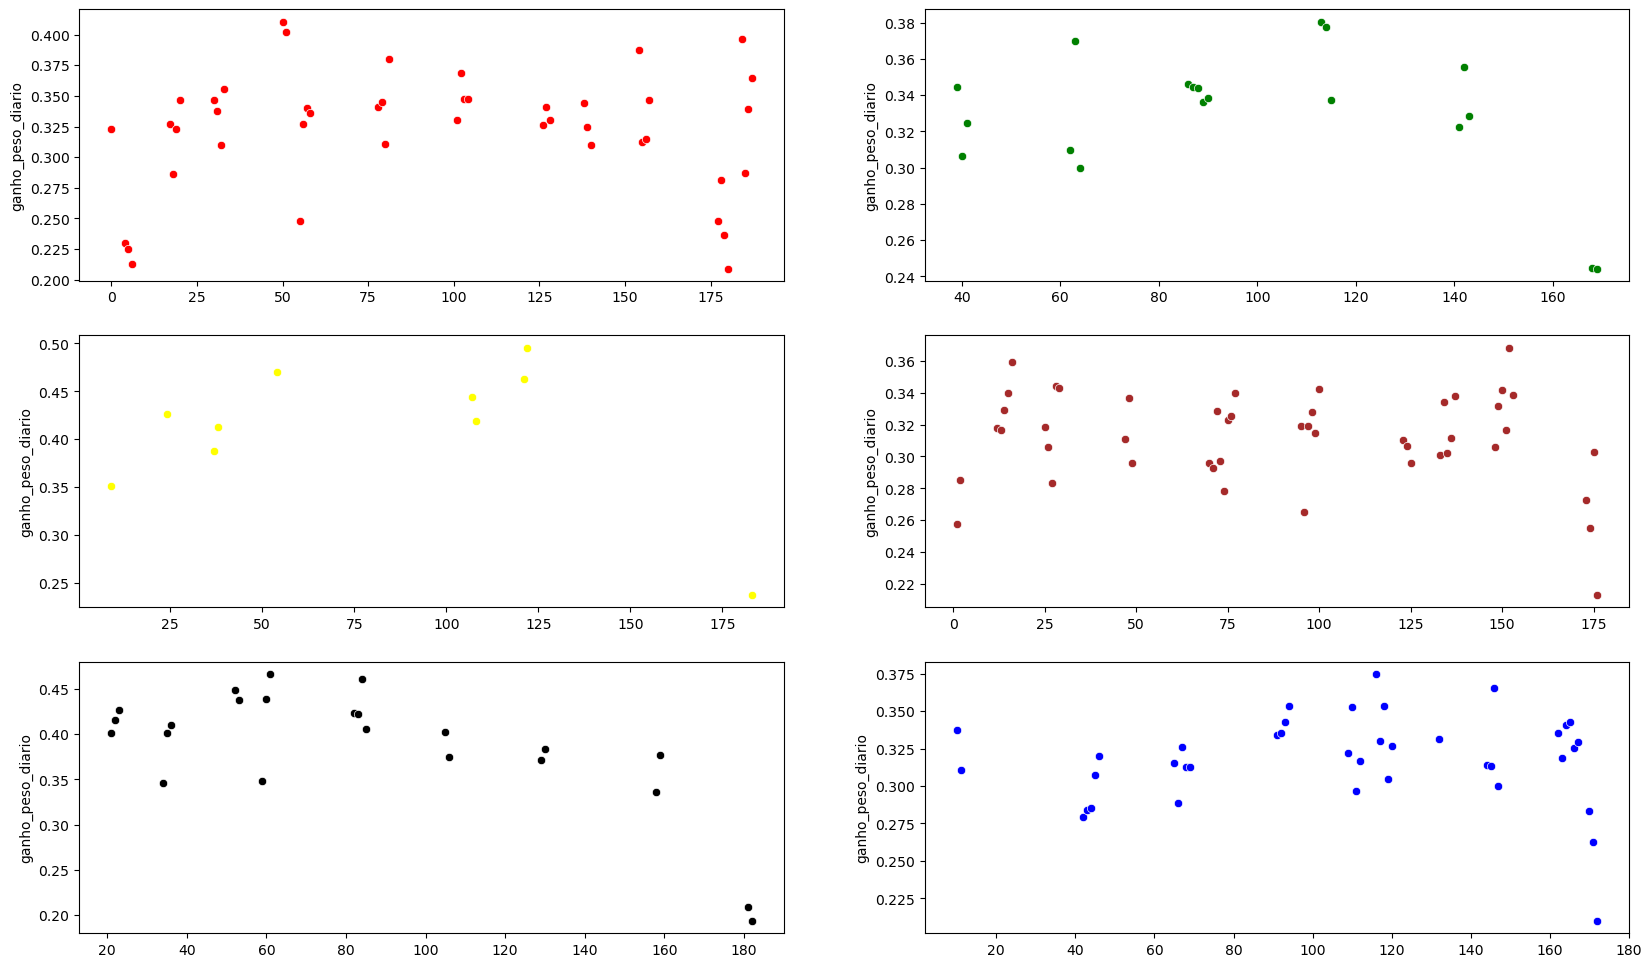

In [176]:
figura = plt.subplots(figsize = (20, 12))
coluna = "ganho_peso_diario"

eixo = plt.subplot(3, 2, 1)
sns.scatterplot(dados_classe_1[coluna], ax = eixo, color = "red")

eixo = plt.subplot(3, 2, 2)
sns.scatterplot(dados_classe_2[coluna], ax = eixo, color = "green")

eixo = plt.subplot(3, 2, 3)
sns.scatterplot(dados_classe_3[coluna], ax = eixo, color = "yellow")

eixo = plt.subplot(3, 2, 4)
sns.scatterplot(dados_classe_4[coluna], ax = eixo, color = "brown")

eixo = plt.subplot(3, 2, 5)
sns.scatterplot(dados_classe_5[coluna], ax = eixo, color = "black")

eixo = plt.subplot(3, 2, 6)
sns.scatterplot(dados_classe_6[coluna], ax = eixo, color = "blue")

plt.show()

/tmp/ipykernel_37105/3351299425.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  eixo = plt.subplot(3, 2, 1)


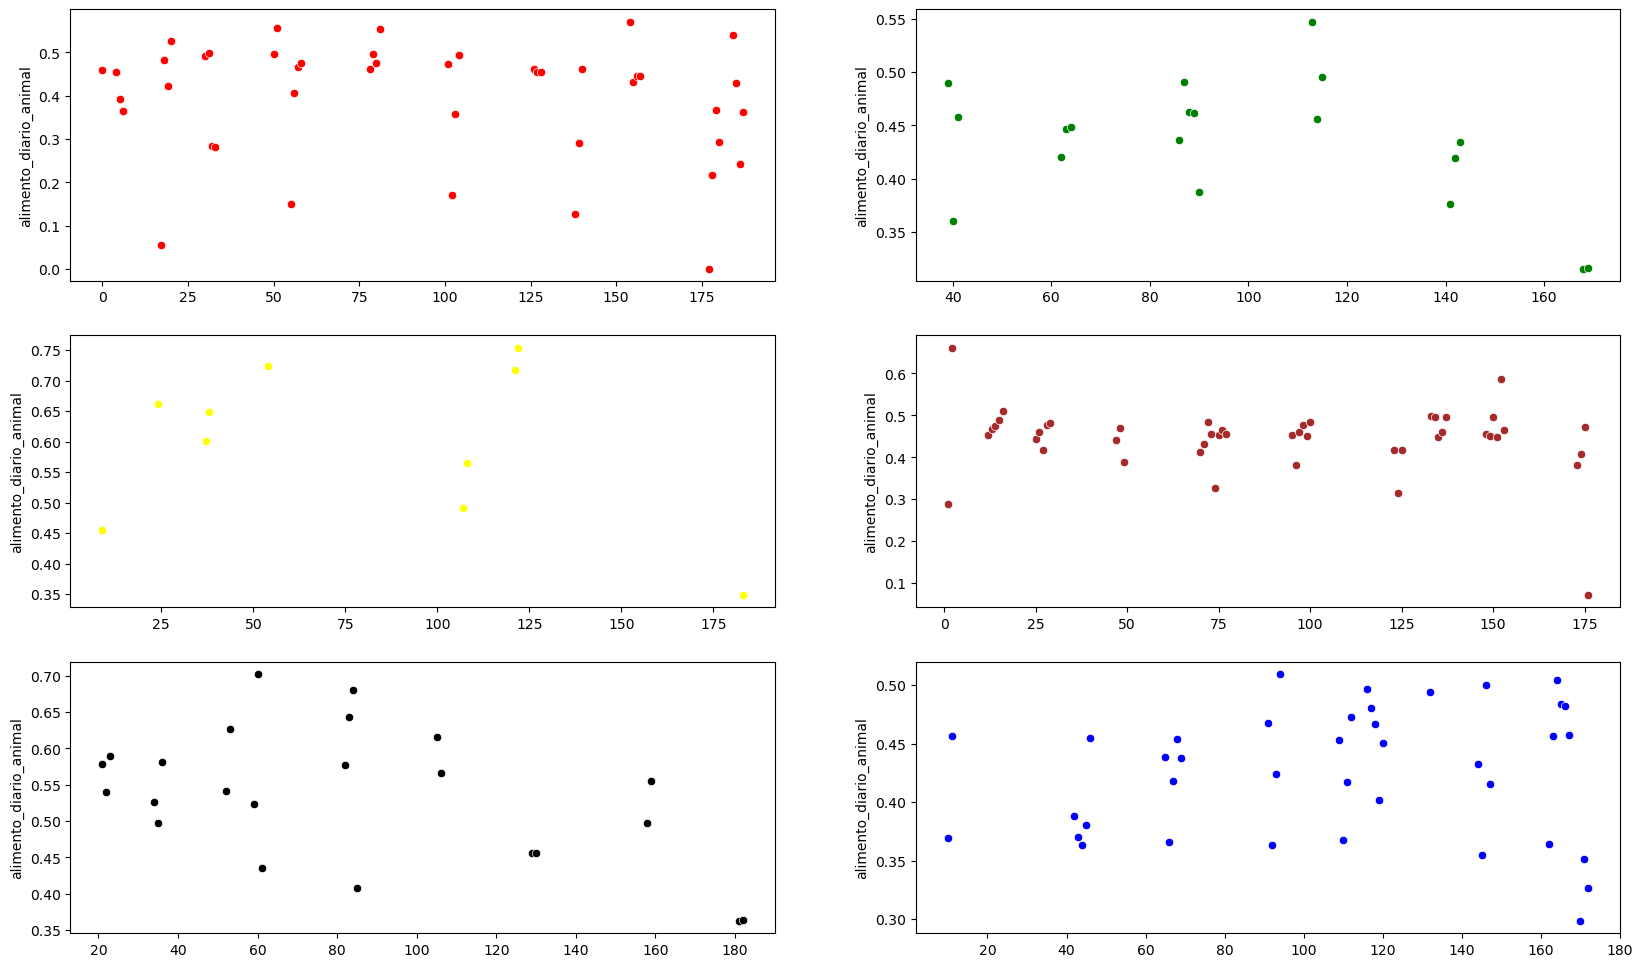

In [177]:
figura = plt.subplots(figsize = (20, 12))
coluna = "alimento_diario_animal"

eixo = plt.subplot(3, 2, 1)
sns.scatterplot(dados_classe_1[coluna], ax = eixo, color = "red")

eixo = plt.subplot(3, 2, 2)
sns.scatterplot(dados_classe_2[coluna], ax = eixo, color = "green")

eixo = plt.subplot(3, 2, 3)
sns.scatterplot(dados_classe_3[coluna], ax = eixo, color = "yellow")

eixo = plt.subplot(3, 2, 4)
sns.scatterplot(dados_classe_4[coluna], ax = eixo, color = "brown")

eixo = plt.subplot(3, 2, 5)
sns.scatterplot(dados_classe_5[coluna], ax = eixo, color = "black")

eixo = plt.subplot(3, 2, 6)
sns.scatterplot(dados_classe_6[coluna], ax = eixo, color = "blue")

plt.show()

/tmp/ipykernel_37105/3284198320.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  eixo = plt.subplot(3, 2, 1)


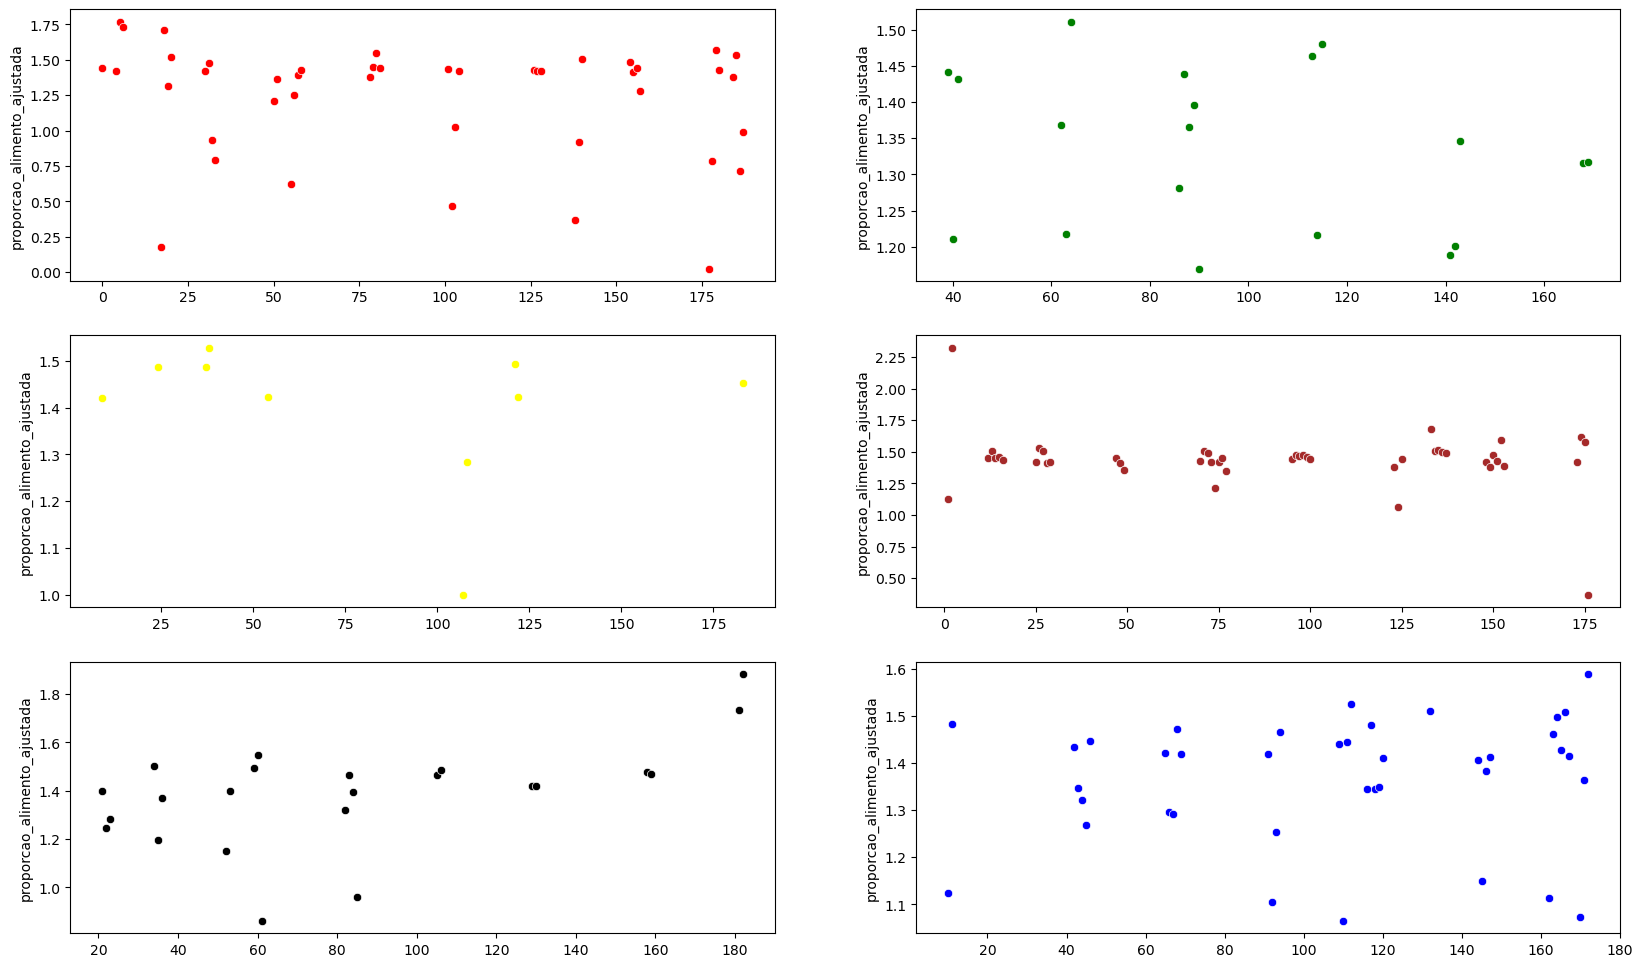

In [178]:
figura = plt.subplots(figsize = (20, 12))
coluna = "proporcao_alimento_ajustada"

eixo = plt.subplot(3, 2, 1)
sns.scatterplot(dados_classe_1[coluna], ax = eixo, color = "red")

eixo = plt.subplot(3, 2, 2)
sns.scatterplot(dados_classe_2[coluna], ax = eixo, color = "green")

eixo = plt.subplot(3, 2, 3)
sns.scatterplot(dados_classe_3[coluna], ax = eixo, color = "yellow")

eixo = plt.subplot(3, 2, 4)
sns.scatterplot(dados_classe_4[coluna], ax = eixo, color = "brown")

eixo = plt.subplot(3, 2, 5)
sns.scatterplot(dados_classe_5[coluna], ax = eixo, color = "black")

eixo = plt.subplot(3, 2, 6)
sns.scatterplot(dados_classe_6[coluna], ax = eixo, color = "blue")

plt.show()

/tmp/ipykernel_37105/3023417111.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  eixo = plt.subplot(3, 2, 1)


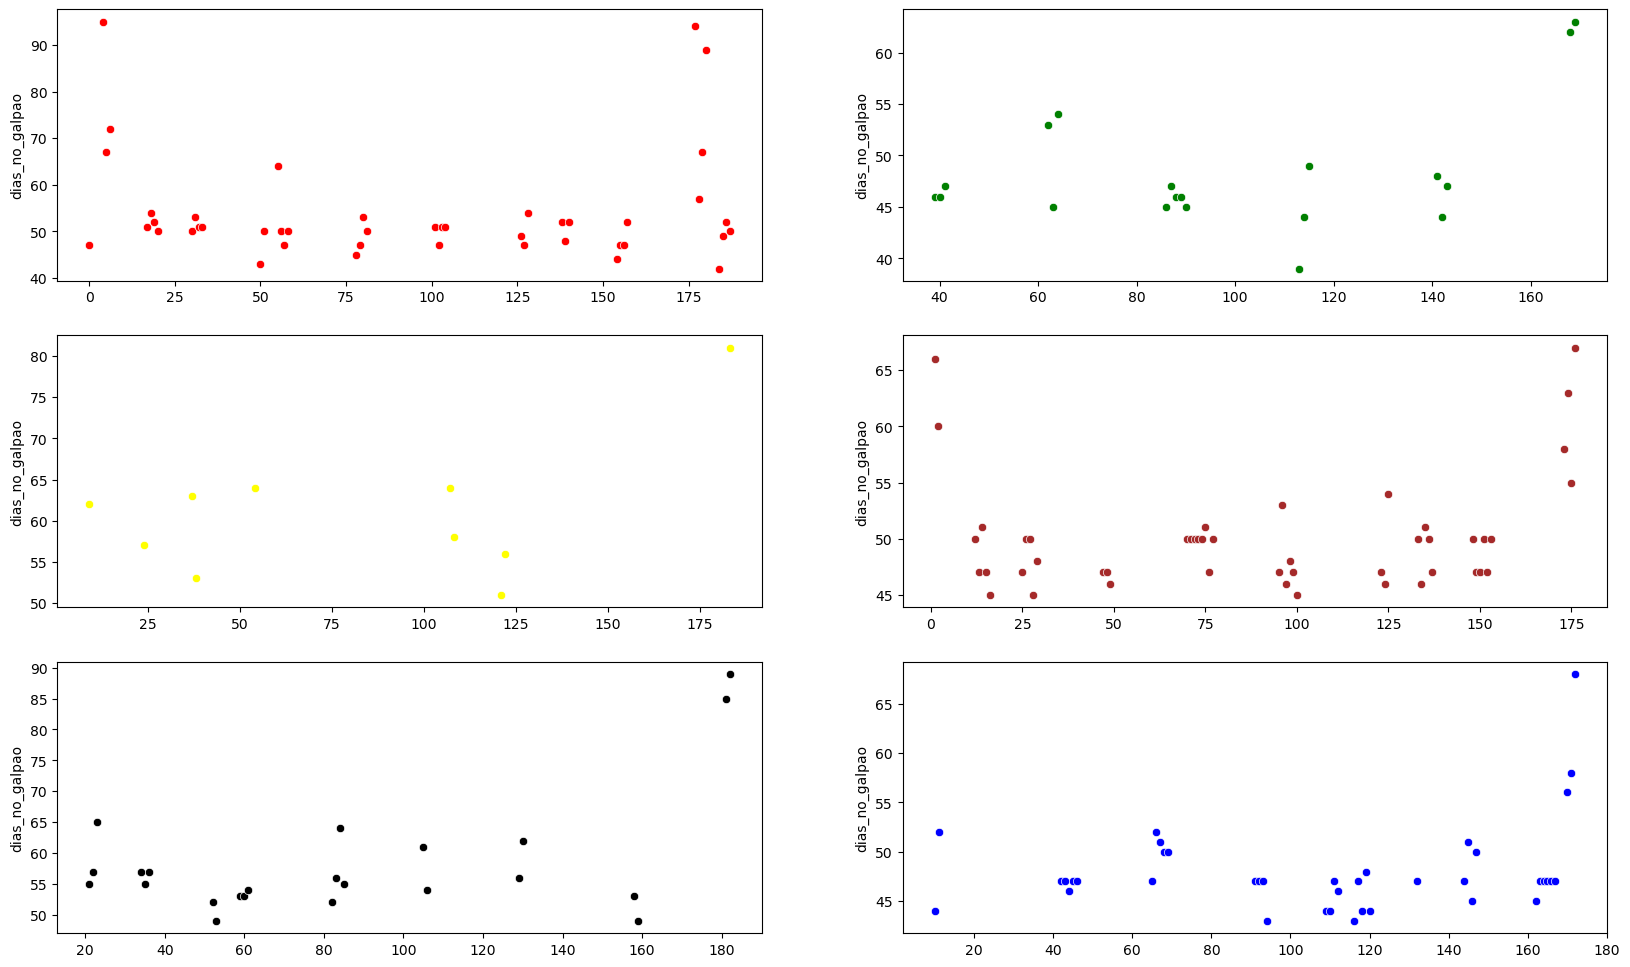

In [179]:
figura = plt.subplots(figsize = (20, 12))
coluna = "dias_no_galpao"

eixo = plt.subplot(3, 2, 1)
sns.scatterplot(dados_classe_1[coluna], ax = eixo, color = "red")

eixo = plt.subplot(3, 2, 2)
sns.scatterplot(dados_classe_2[coluna], ax = eixo, color = "green")

eixo = plt.subplot(3, 2, 3)
sns.scatterplot(dados_classe_3[coluna], ax = eixo, color = "yellow")

eixo = plt.subplot(3, 2, 4)
sns.scatterplot(dados_classe_4[coluna], ax = eixo, color = "brown")

eixo = plt.subplot(3, 2, 5)
sns.scatterplot(dados_classe_5[coluna], ax = eixo, color = "black")

eixo = plt.subplot(3, 2, 6)
sns.scatterplot(dados_classe_6[coluna], ax = eixo, color = "blue")

plt.show()